# Surprise House Price Prediction Using MLR & Regularization Techniques


The solution is divided into the following sections: 
- EDA
- Data cleaning
- Data preparation
- Model building and evaluation

### 1. Data Understanding and Exploration

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the data
house=pd.read_csv("train.csv")

In [3]:
#review the shape of the data
house.shape

(1460, 81)

In [4]:
#check the top 5 rows data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Review column level details, name of the columns, data type, null values 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
### 2. Data cleaning

In [8]:
#review for null values
round(house.isnull().sum()/len(house)*100)/2

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage       9.0
LotArea           0.0
Street            0.0
Alley            47.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.5
MasVnrArea        0.5
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          1.5
BsmtCond          1.5
BsmtExposure      1.5
BsmtFinType1      1.5
BsmtFinSF1        0.0
BsmtFinType2      1.5
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFin

In [9]:
#Fill the null values in median and mode for Lotfrontage and electrical variables
house['LotFrontage'].fillna(house['LotFrontage'].median(),inplace=True)
house['Electrical'].fillna(house['Electrical'].mode(),inplace=True)
house['GarageYrBlt'].fillna(0,inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)
house['GarageFinish'].fillna('None',inplace=True)
house['GarageType'].fillna('None',inplace=True)
house['GarageYrBlt'].fillna('None',inplace=True)
house['GarageCond'].fillna('None',inplace=True)
house['GarageQual'].fillna('None',inplace=True)
house['BsmtExposure'].fillna('None',inplace=True)
house['BsmtFinType2'].fillna('None',inplace=True)
house['BsmtFinType1'].fillna('None',inplace=True)
house['BsmtCond'].fillna('None',inplace=True)
house['BsmtQual'].fillna('None',inplace=True)
house['MasVnrType'].fillna('None',inplace=True)
house['Alley'].fillna('None',inplace=True)
house['FireplaceQu'].fillna('None',inplace=True)
house['PoolQC'].fillna('None',inplace=True)
house['Fence'].fillna('None',inplace=True)
house['MiscFeature'].fillna('None',inplace=True)

In [10]:
#review the individual Categorical variables
object_type = house.select_dtypes('object')

In [11]:
for cat_var in object_type:
    print(house[cat_var].value_counts(normalize=True,dropna=False))
    print('\n')
    

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64


Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64


None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64


Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64


Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64


AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64


Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64


Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64


NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.03493

In [12]:
#As per the review we have variables having high# of levels. Need to reduce the categories that have higher levels into limited by grouping few of the categories based on their distribution% 

house['Neighborhood'] = house['Neighborhood'].replace(['Mitchel','NoRidge','Timber','IDOTRR','ClearCr','SWISU','StoneBr','MeadowV','Blmngtn','BrDale','Veenker','NPkVill','Blueste'],'Other_neighbor')
house['Condition1']=house['Condition1'].replace(['RRAn','PoSN','RRAe','PoSA','RRNn','RRNe'],'Other_Condition1')
house['Condition2']=house['Condition2'].replace(['RRNn','Artery','RRAn','RRAe','PosA'],'Other_Condition2')
house['HouseStyle']=house['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Other_Housestyle')
house['RoofStyle']=house['RoofStyle'].replace(['Flat','Gambrel','Mansard','Shed'],'Other_RoofStyle')
house['RoofMatl']=house['RoofMatl'].replace(['WdShake','Membran','Metal','ClyTile','Roll'],'Other_RoofMatl')
house['Exterior1st']=house['Exterior1st'].replace(['CemntdBd','BrkFace','WdShing','Stucco','AsbShng','BrkComm','Stone','CBlock','AsphShn','ImStucc'],'Other_Exterior1st')
house['Exterior2nd']=house['Exterior2nd'].replace(['CmentBd','Wd shng','Stucco','BrkFace','AsbShng','ImStucc','Brk Cmn','Stone','AsphShn','CBlock','Other'],'Other_Exterior2nd') 
house['ExterCond']=house['ExterCond'].replace(['Ex','Po'],'Other_ExterCond')
house['Foundation']=house['Foundation'].replace(['Stone','Wood'],'Other_Found')
house['GarageType']=house['GarageType'].replace(['CarPort','2Types'],'Other_GarageType')
house['GarageQual']=house['GarageQual'].replace(['Po','Ex','Gd'],'Other_GarageQual')
house['GarageCond']=house['GarageCond'].replace(['Gd','Po','Ex'],'Other_GarageCond')
house['SaleType']=house['SaleType'].replace(['ConLI','ConLw','CWD','Oth','Con'],'Other_SaleType')                                            

Text(0.5, 0, 'Price')

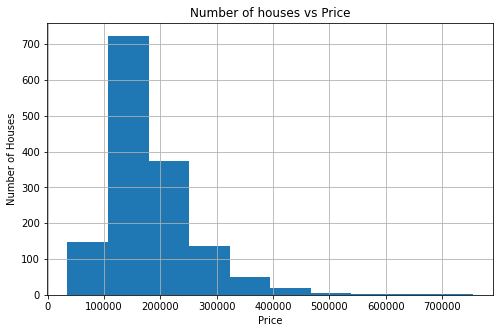

In [13]:
#review the Target variable 
house.hist('SalePrice',figsize=(8,5))
plt.title('Number of houses vs Price')
plt.ylabel('Number of Houses')
plt.xlabel("Price")
#As the target variable is right skewed, let us use the logarithmic transformation for that and use that as our predictor variable.

Text(0.5, 0, 'log(Price)')

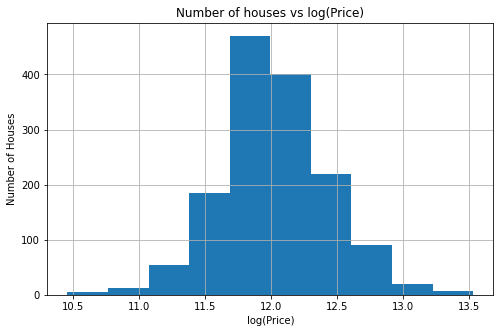

In [14]:
#Target variable is right skewed, transform the target variable using natural log.
house['log_price'] = np.log(house['SalePrice'])
house.hist('log_price',figsize=(8,5))
plt.title('Number of houses vs log(Price)')
plt.ylabel('Number of Houses')
plt.xlabel("log(Price)")

In [15]:
#Other Numeric data review
numeric_data= house.select_dtypes(include=['int64','float64'])

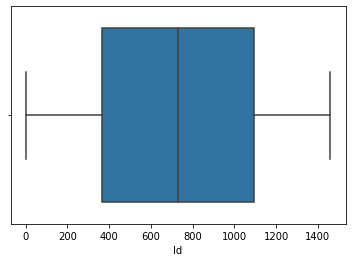

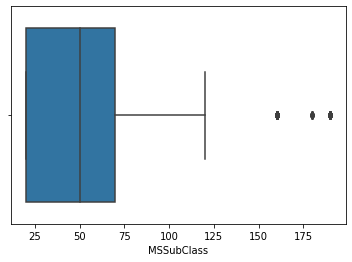

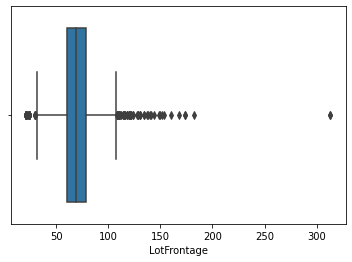

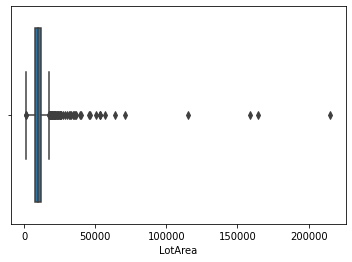

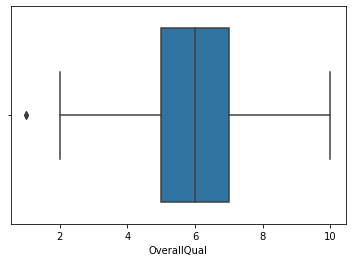

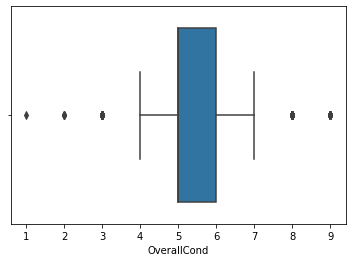

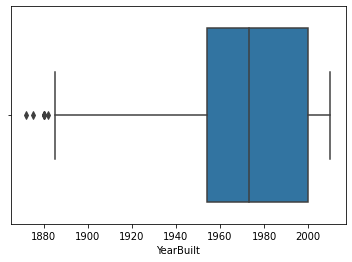

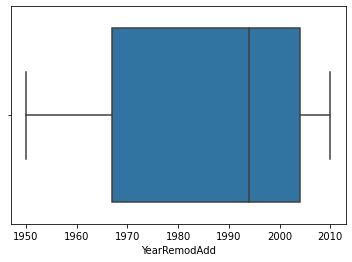

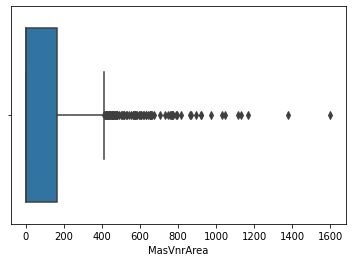

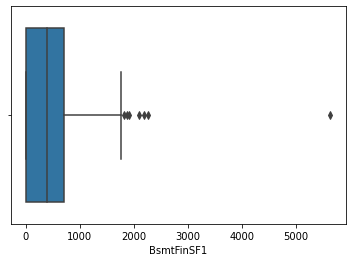

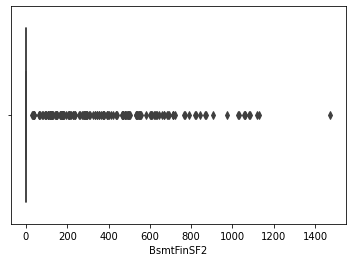

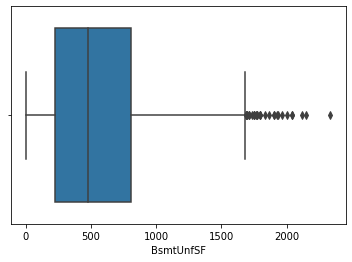

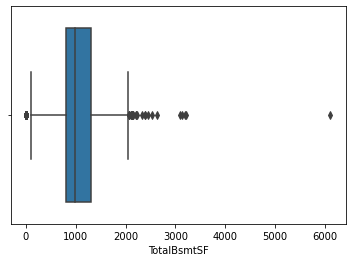

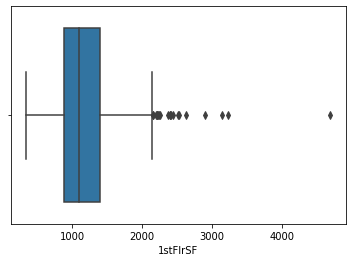

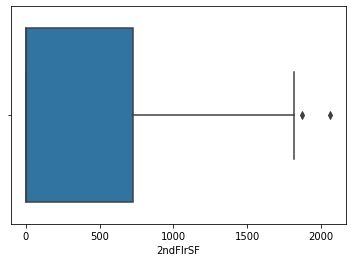

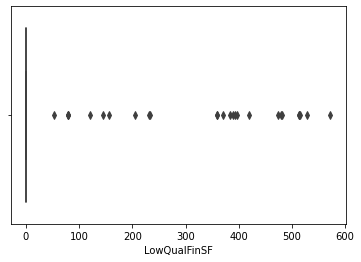

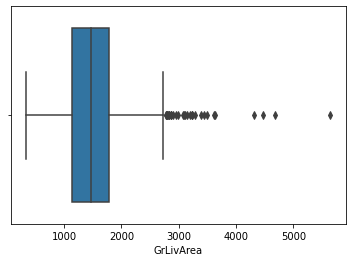

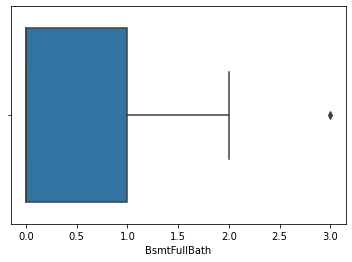

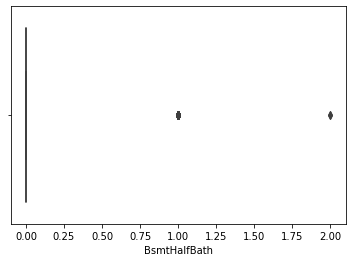

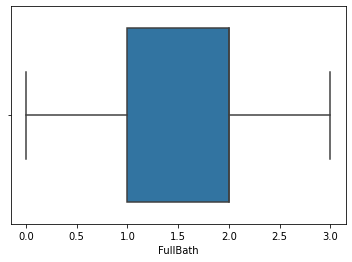

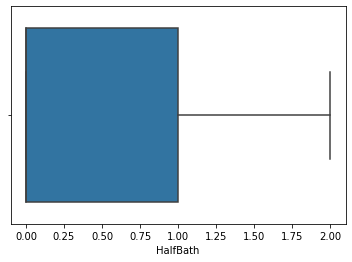

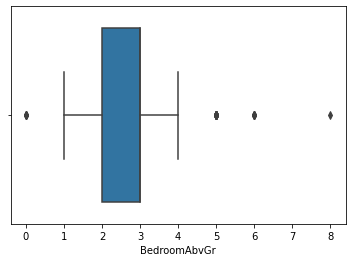

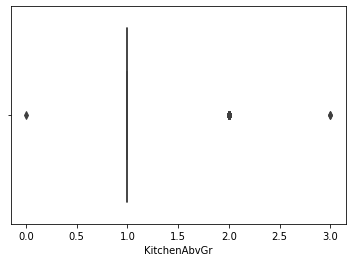

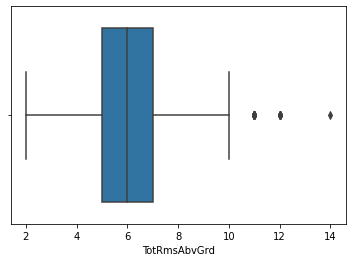

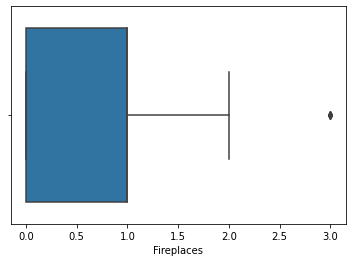

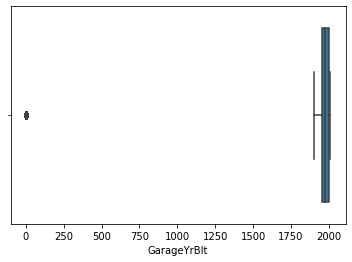

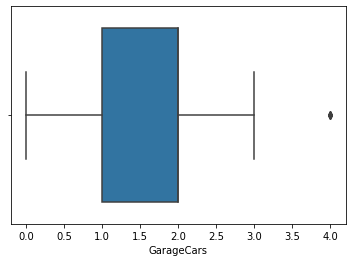

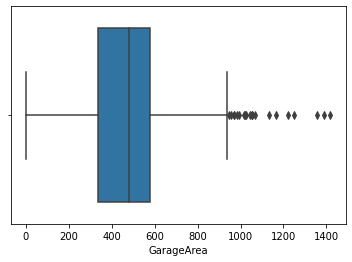

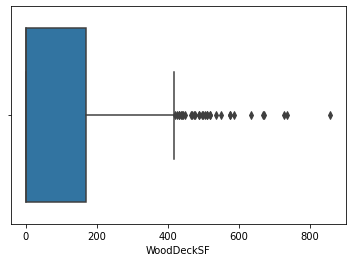

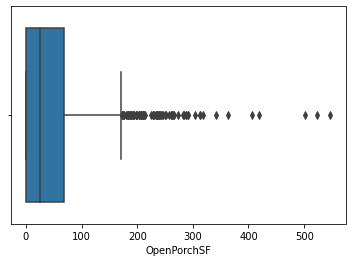

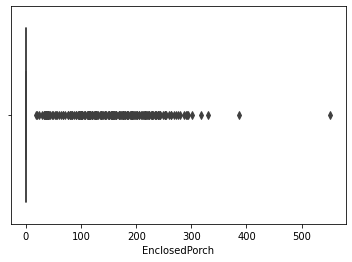

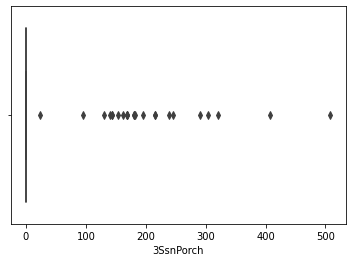

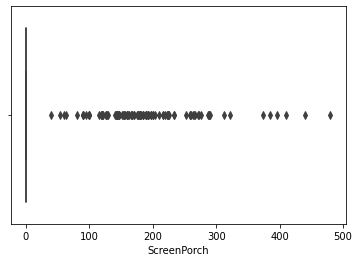

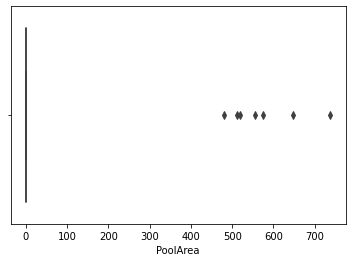

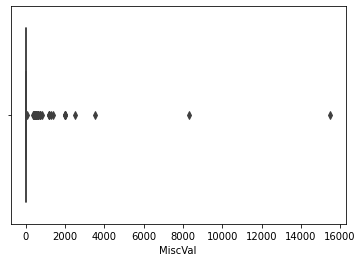

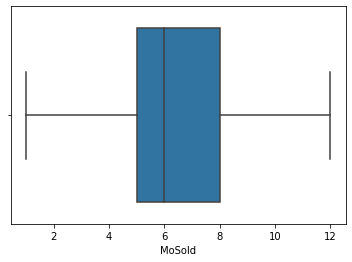

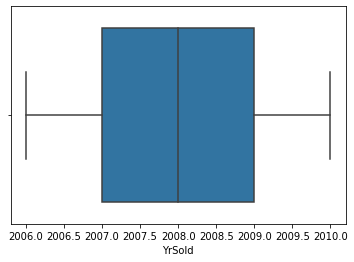

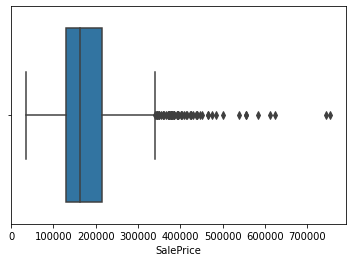

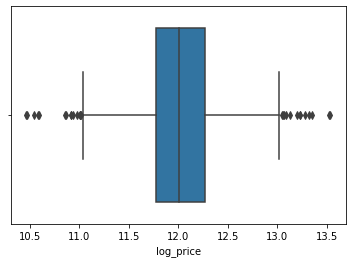

In [16]:
for num_var in numeric_data:
    sns.boxplot(house[num_var])
    plt.show()

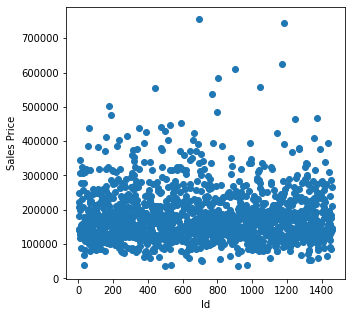

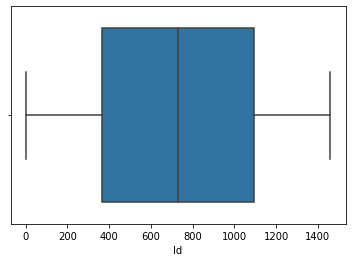

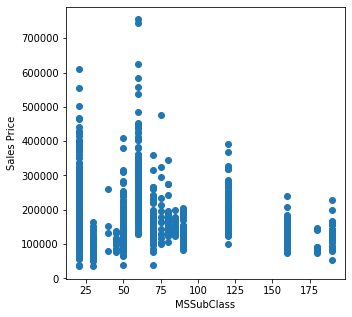

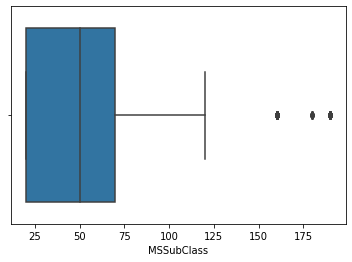

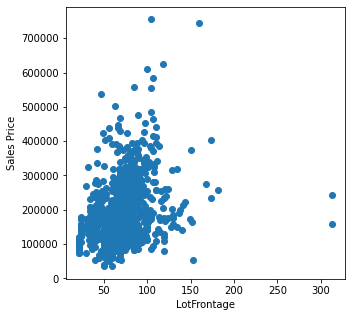

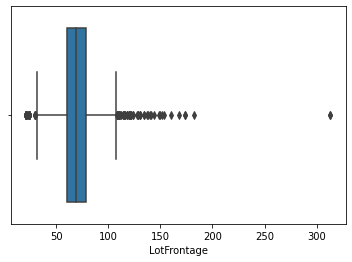

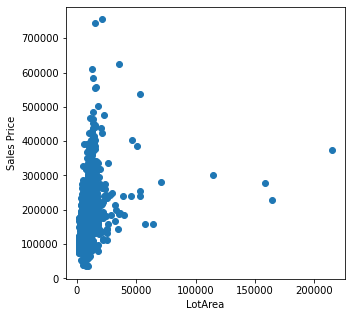

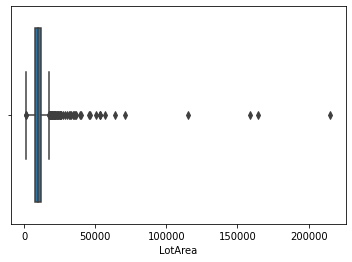

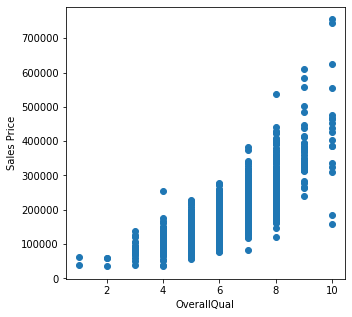

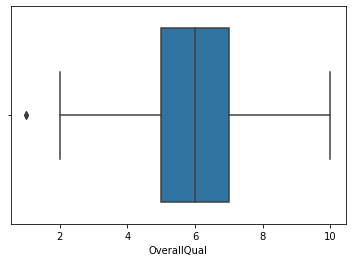

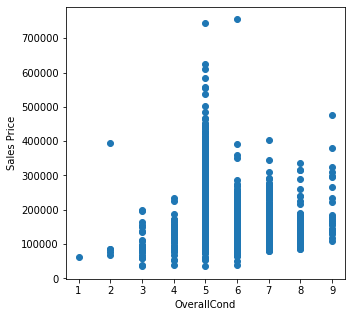

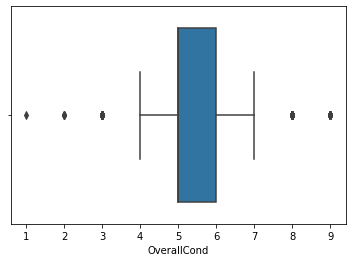

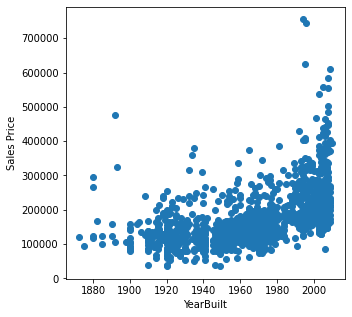

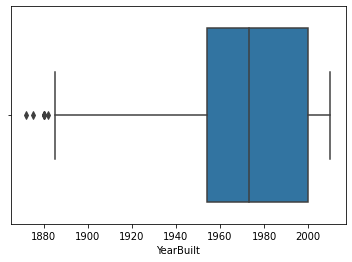

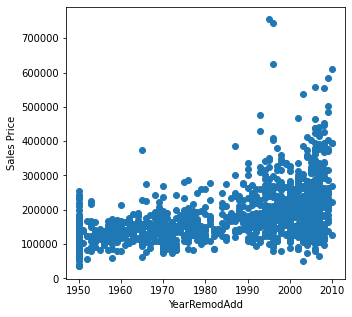

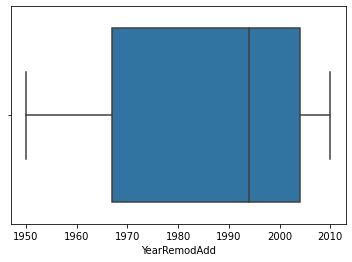

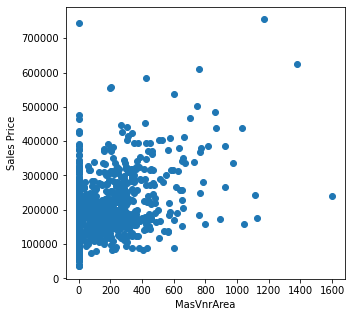

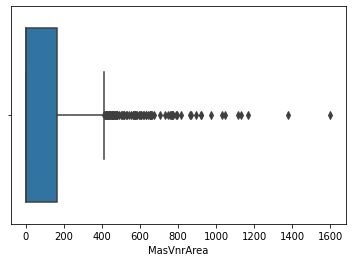

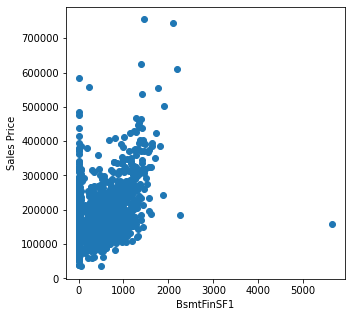

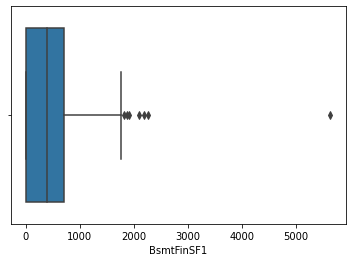

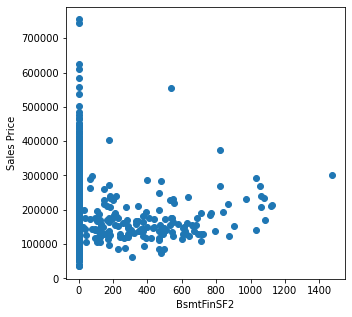

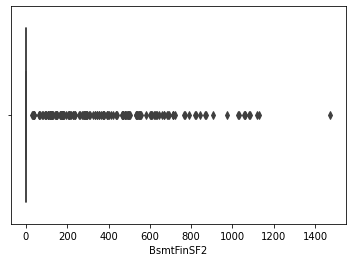

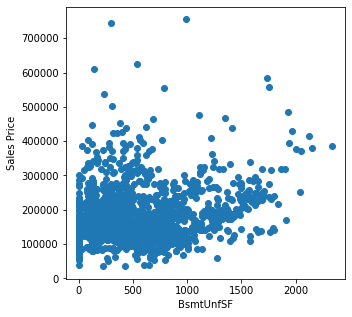

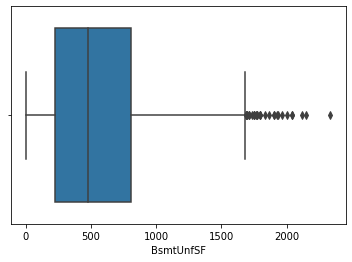

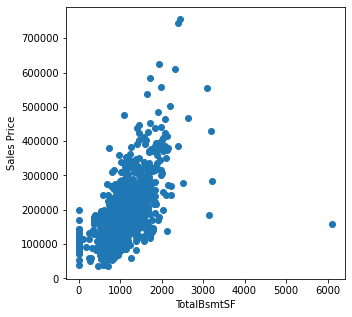

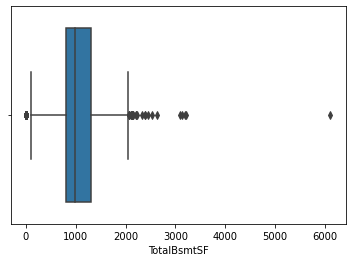

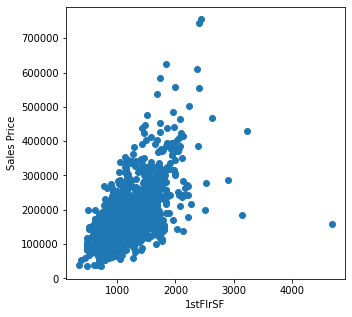

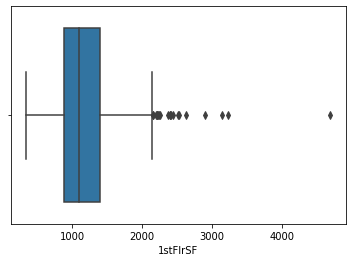

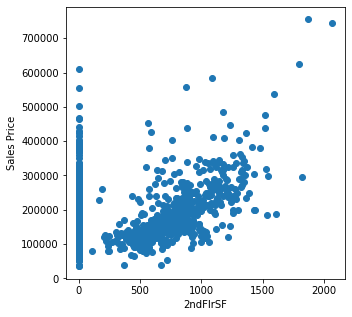

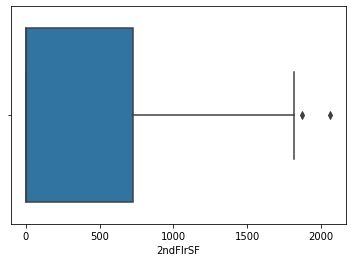

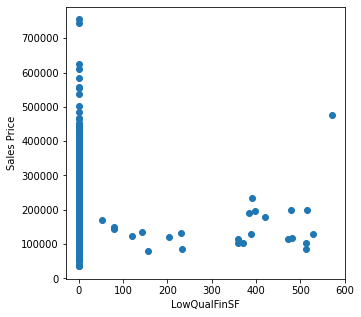

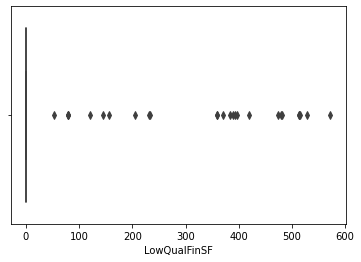

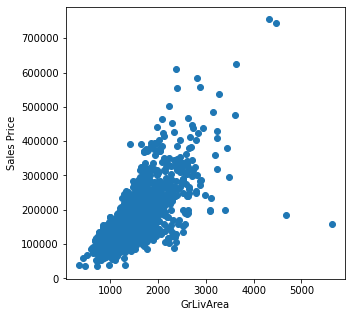

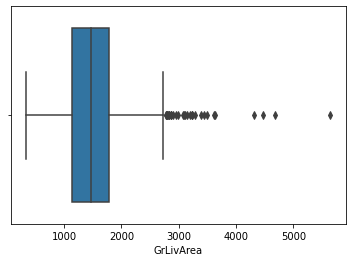

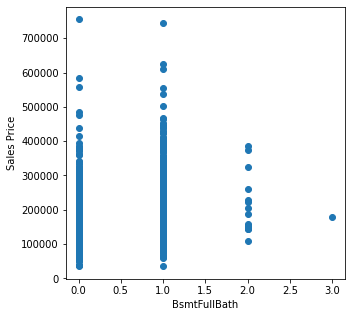

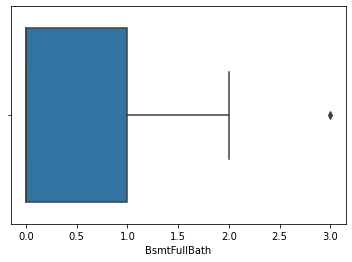

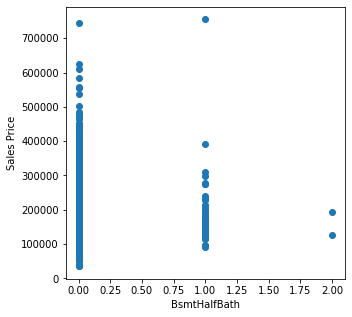

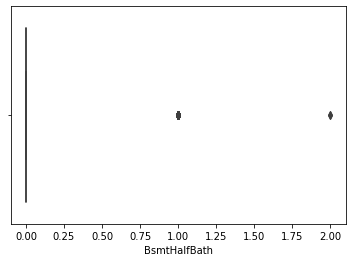

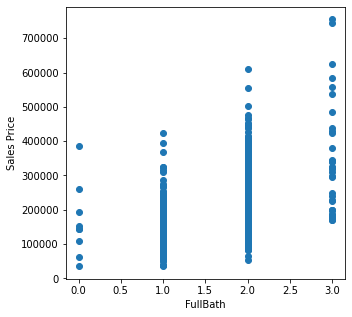

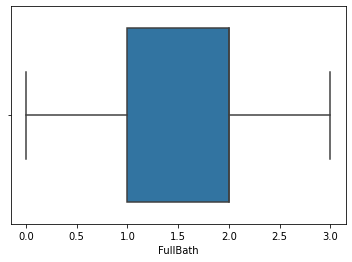

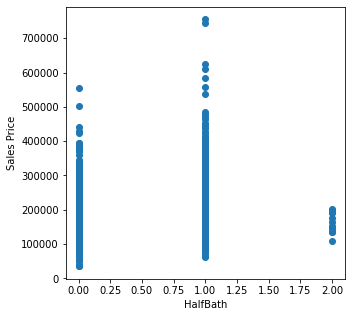

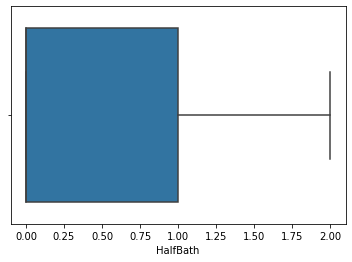

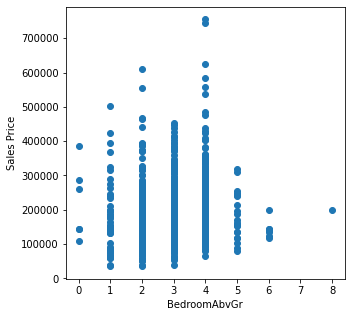

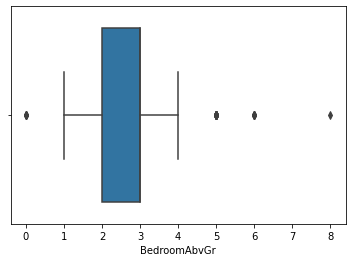

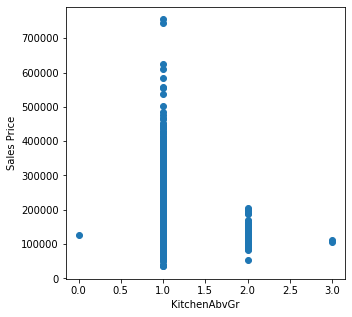

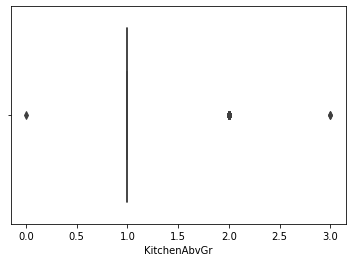

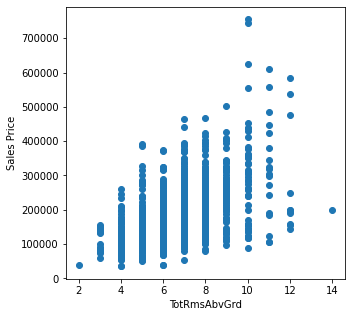

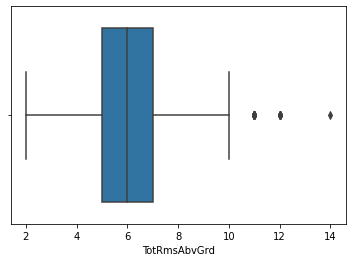

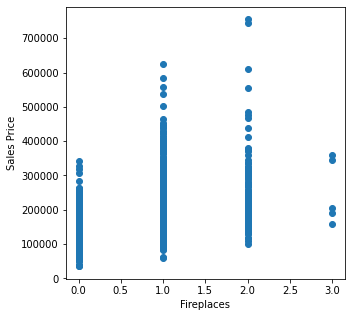

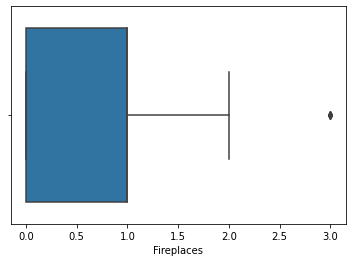

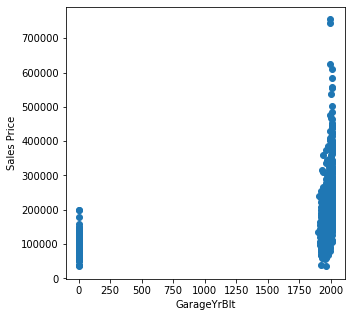

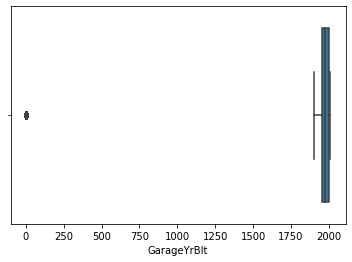

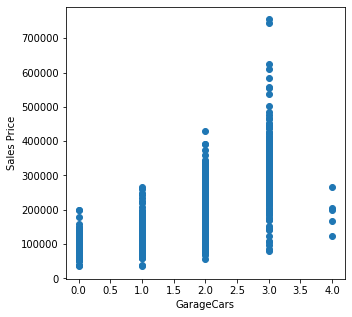

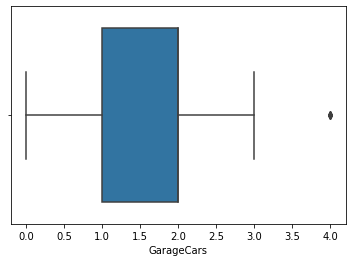

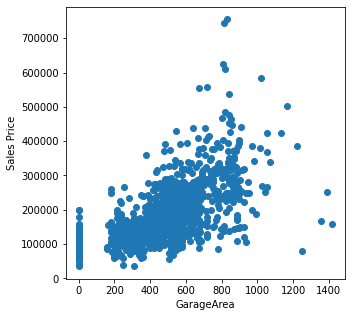

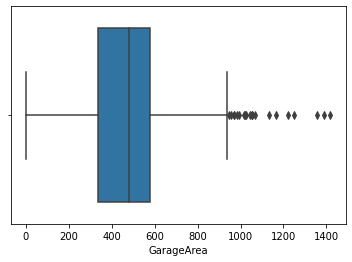

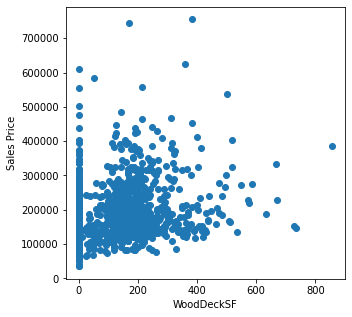

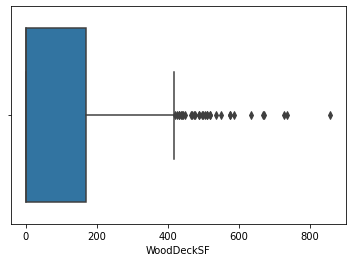

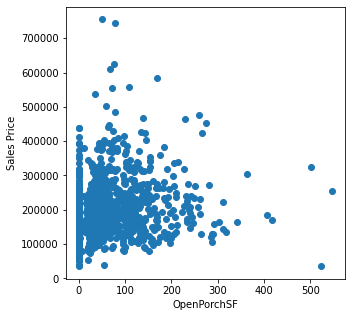

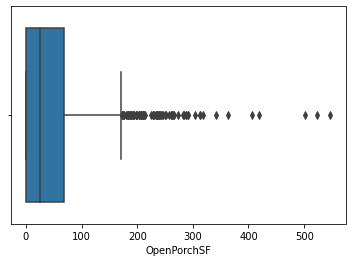

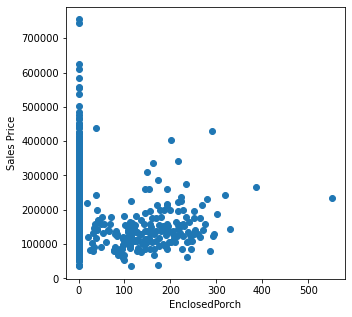

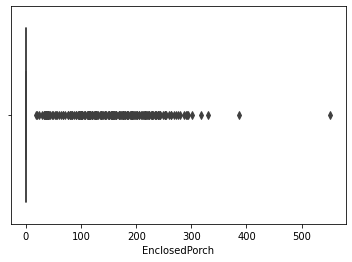

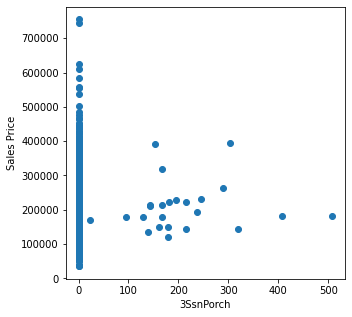

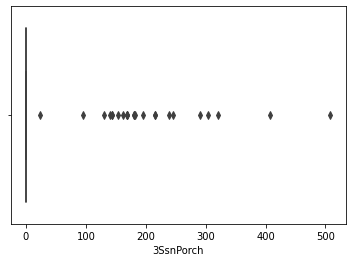

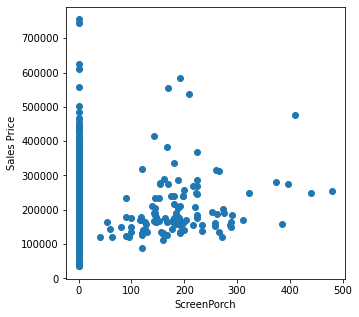

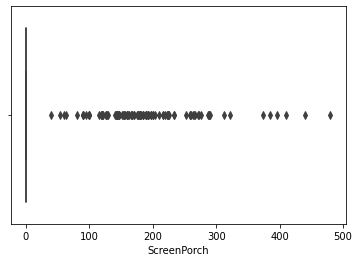

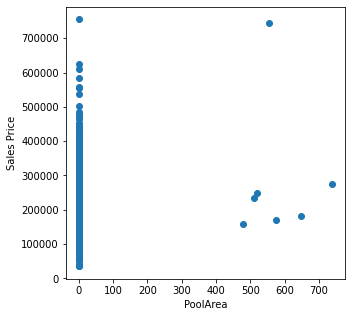

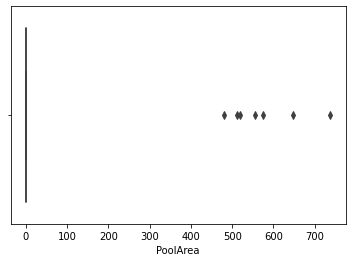

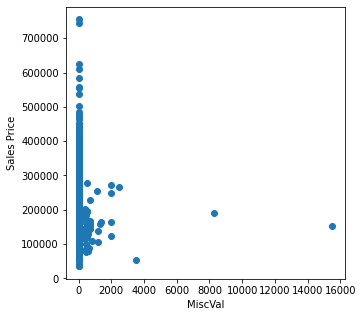

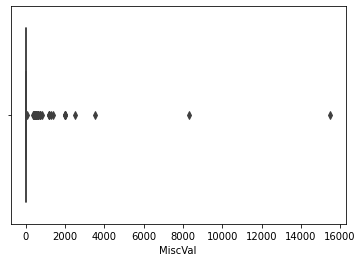

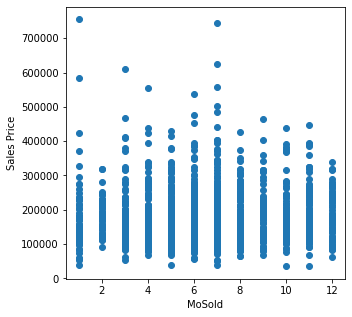

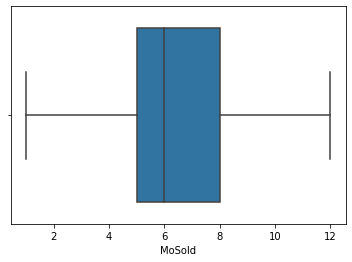

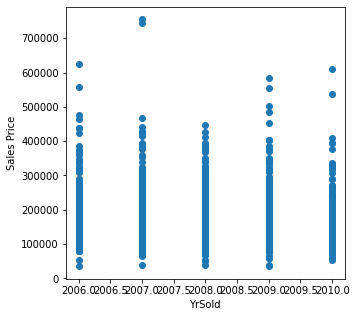

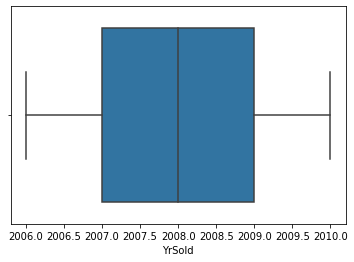

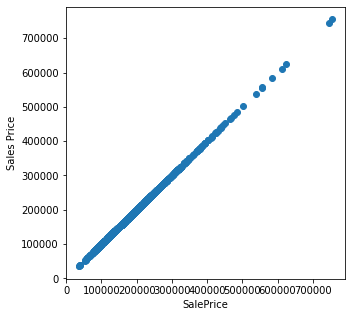

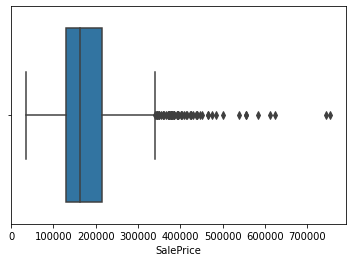

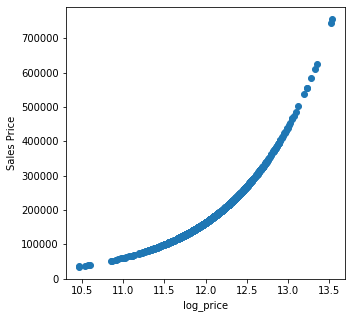

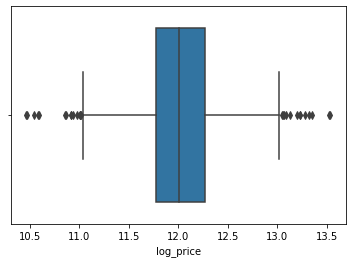

In [17]:
for num_var in numeric_data:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(house[num_var], house['SalePrice'])
    ax.set_xlabel(num_var)
    ax.set_ylabel('Sales Price')
    plt.show()
    
    sns.boxplot(house[num_var])
    
    

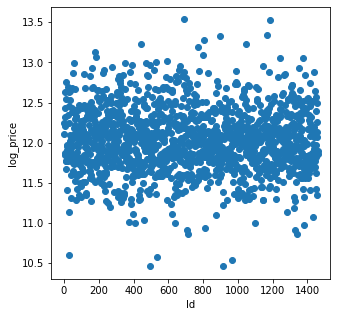

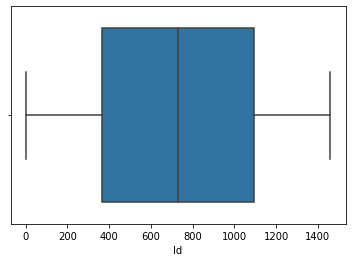

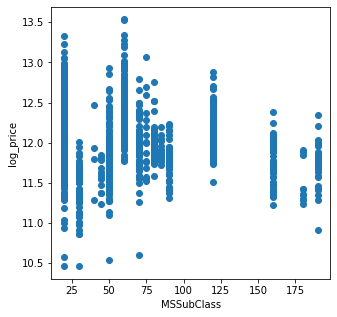

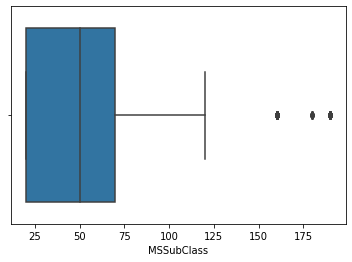

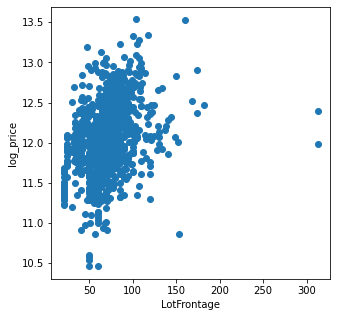

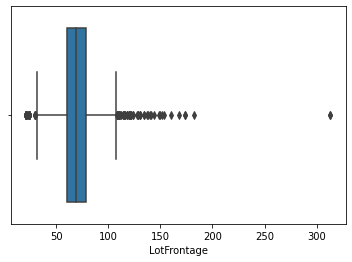

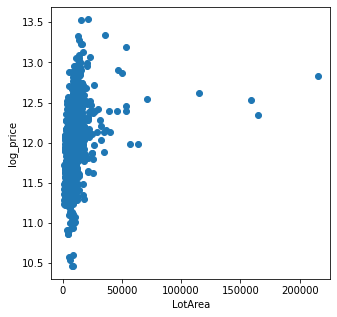

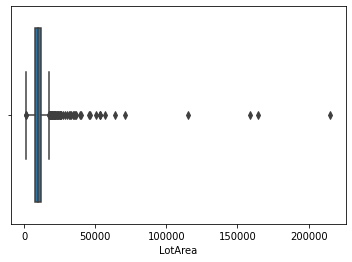

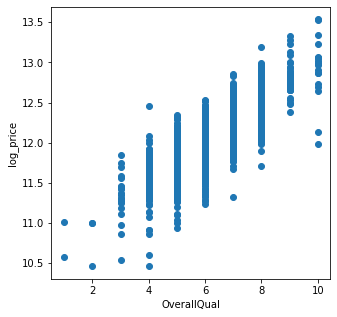

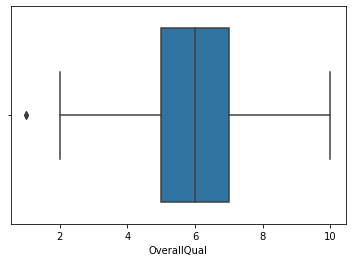

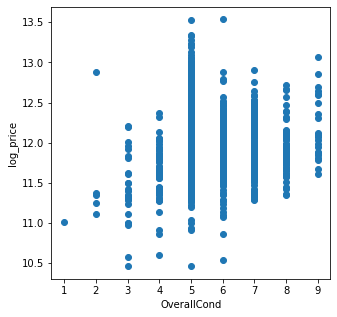

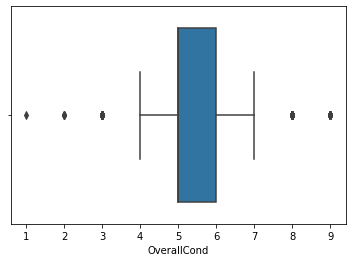

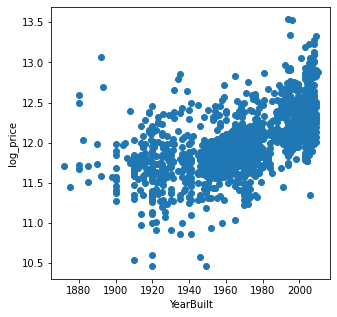

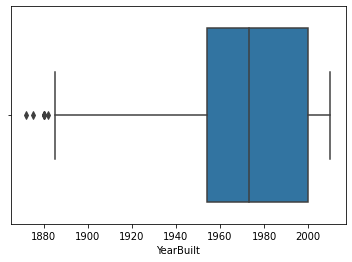

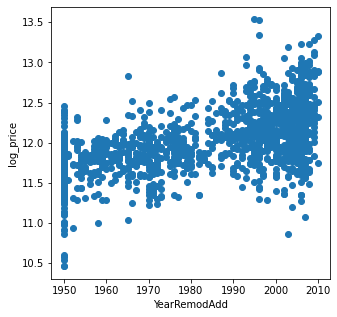

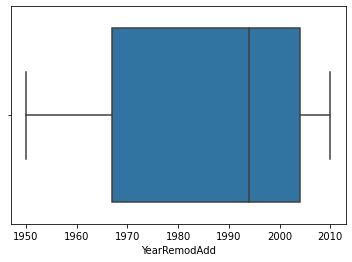

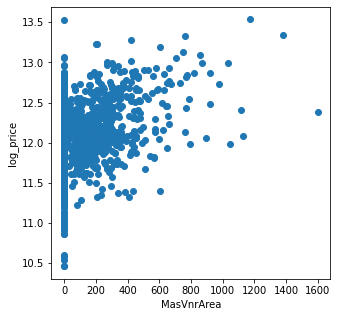

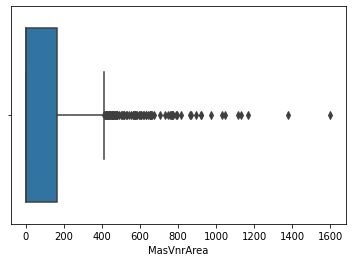

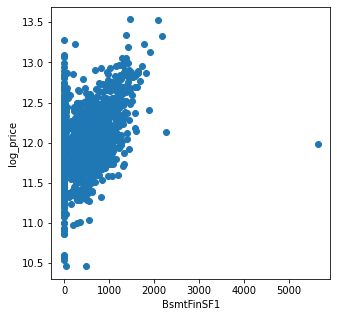

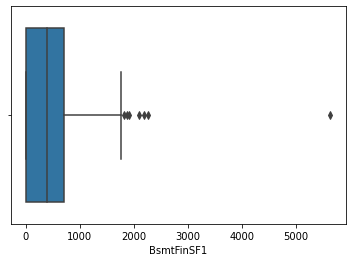

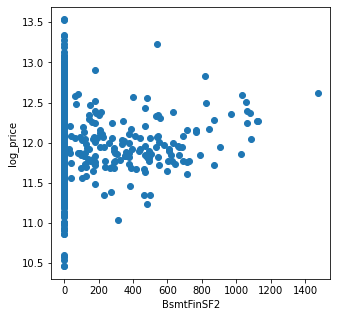

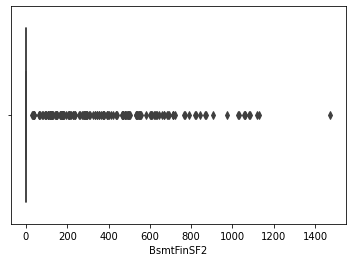

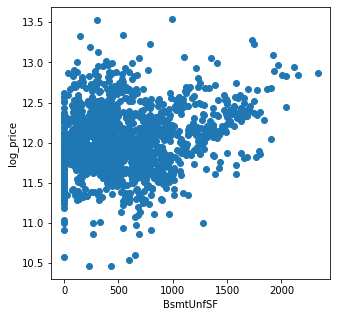

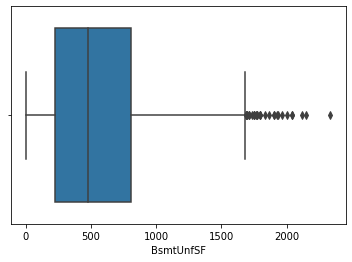

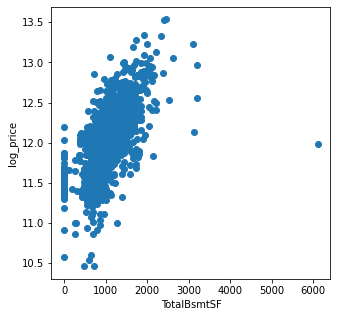

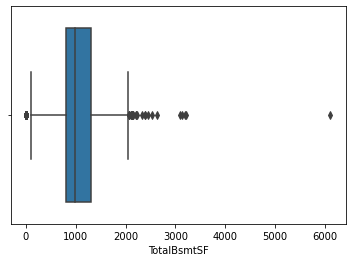

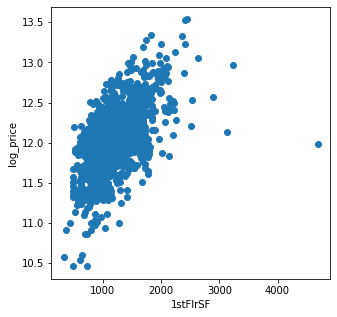

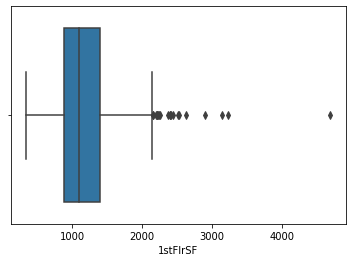

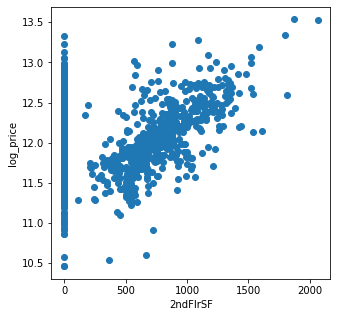

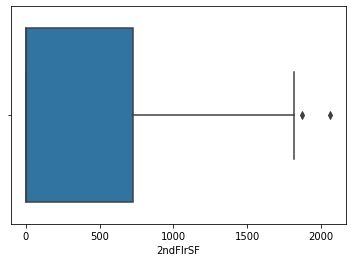

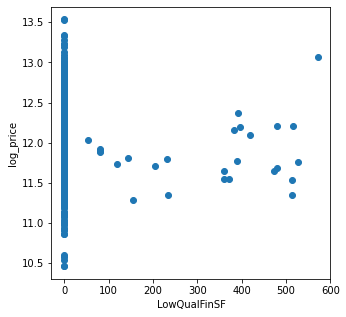

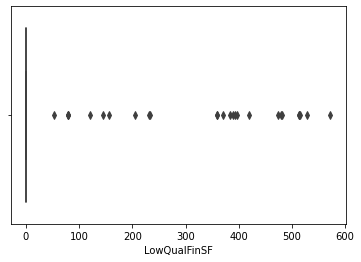

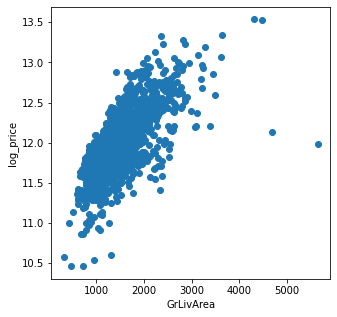

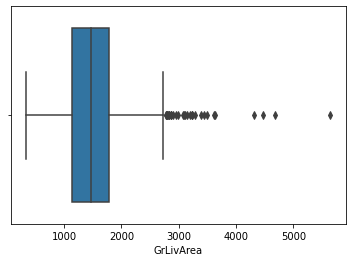

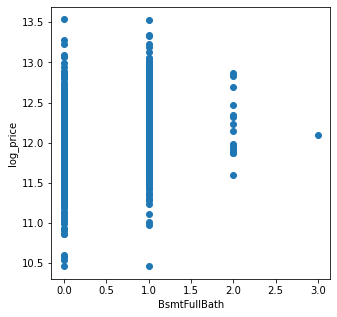

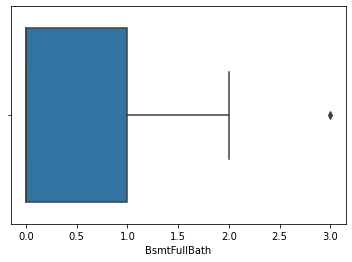

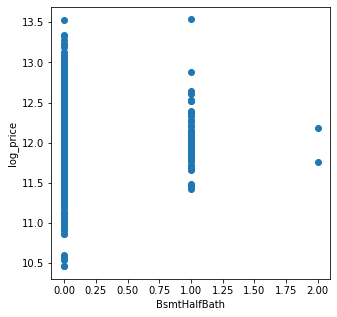

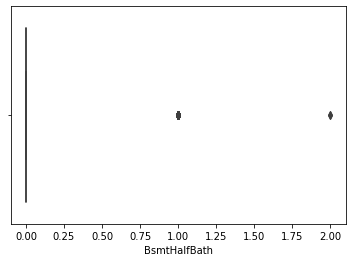

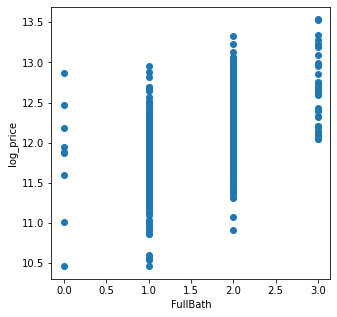

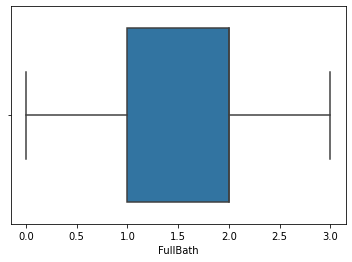

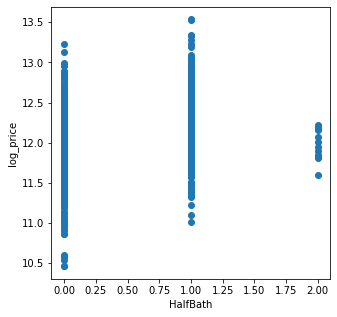

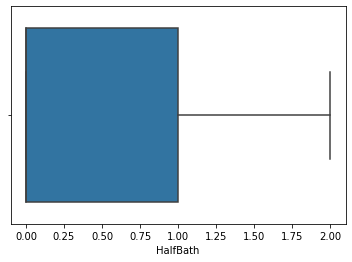

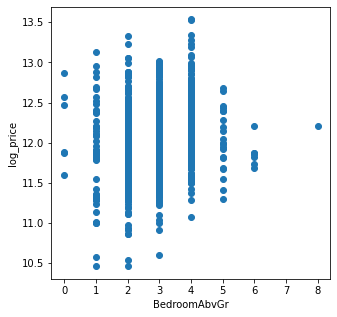

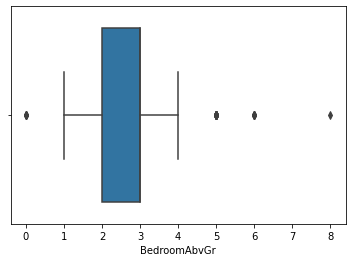

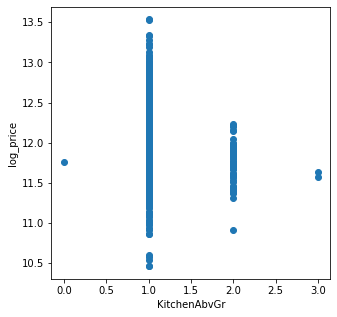

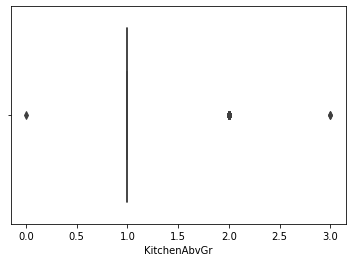

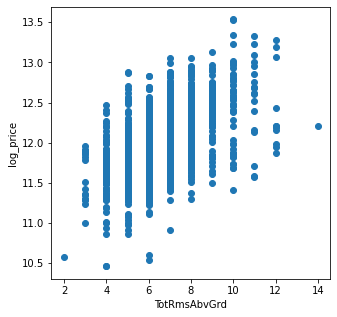

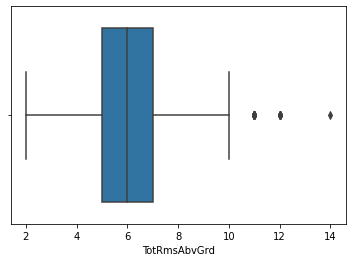

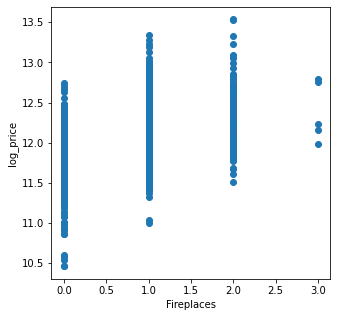

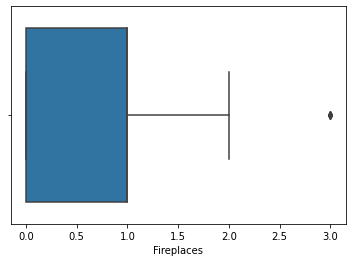

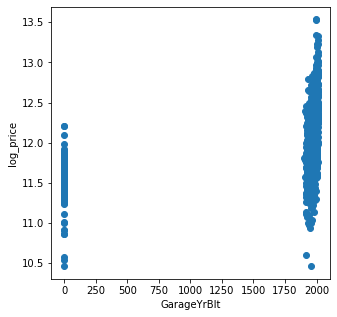

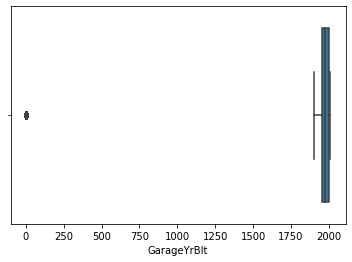

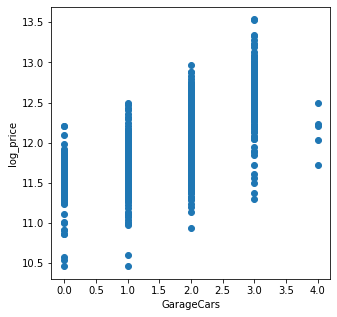

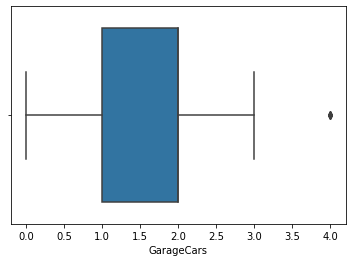

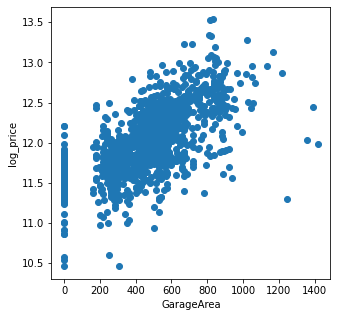

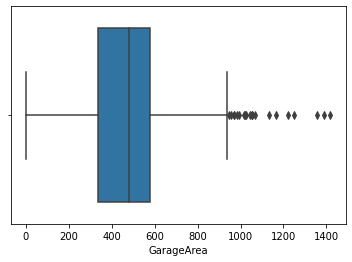

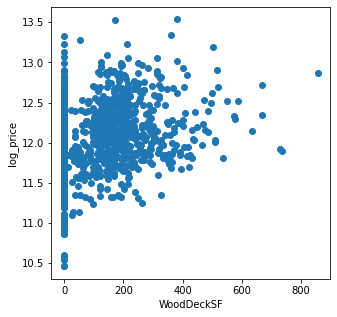

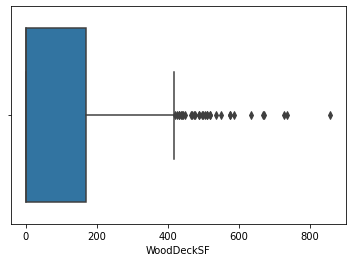

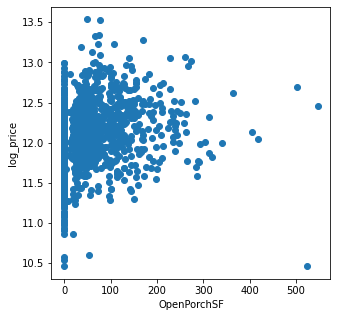

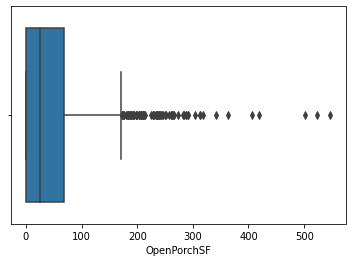

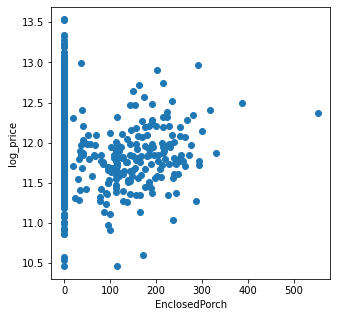

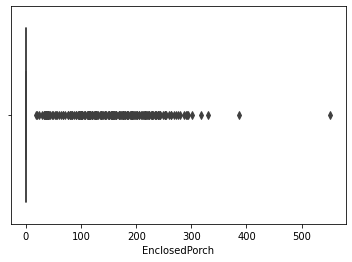

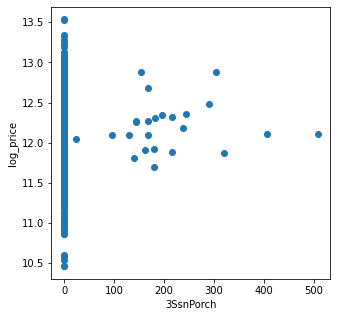

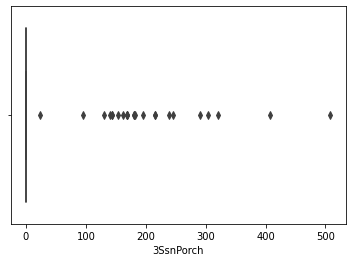

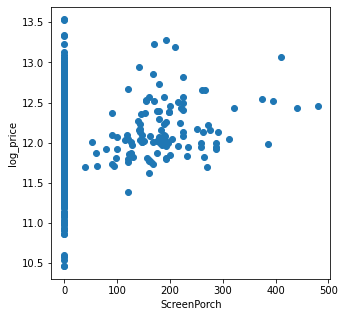

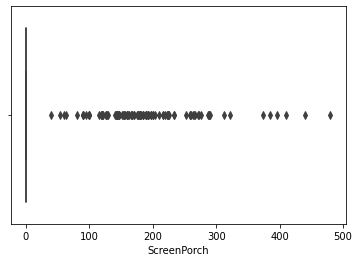

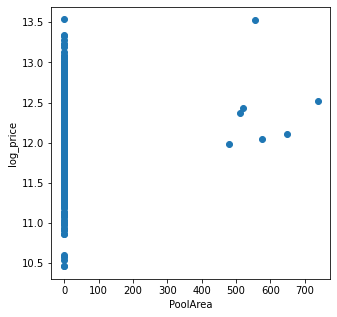

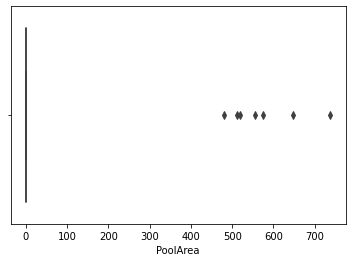

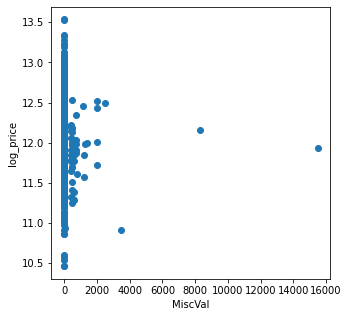

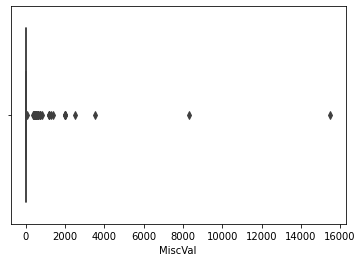

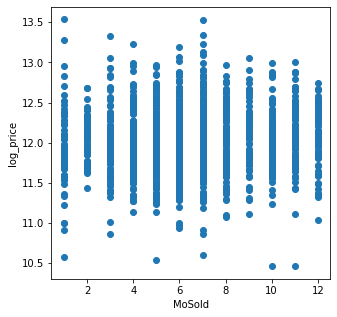

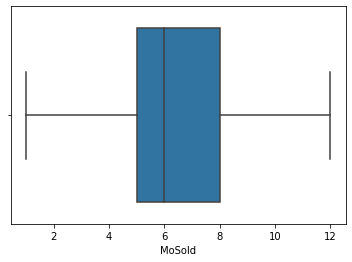

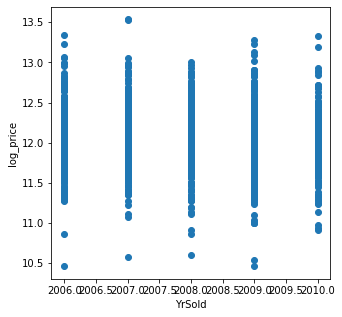

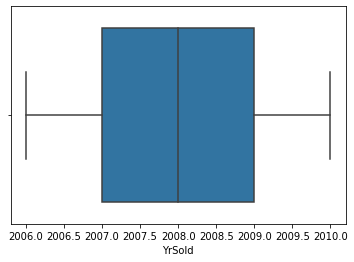

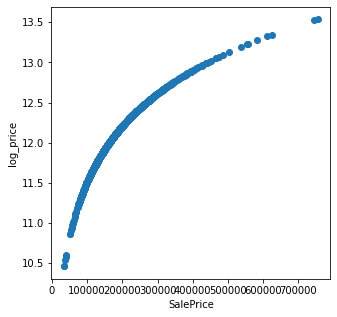

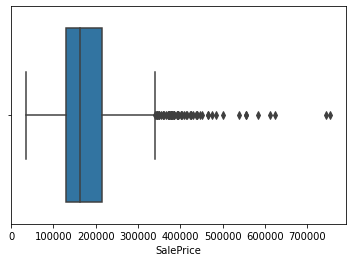

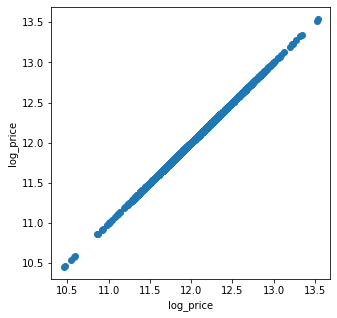

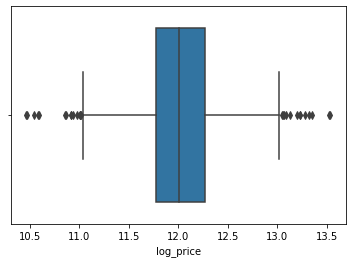

In [18]:
for num_var in numeric_data:
    fig, ax = plt.subplots(figsize=(5,5))
    ax.scatter(house[num_var], house['log_price'])
    ax.set_xlabel(num_var)
    ax.set_ylabel('log_price')
    plt.show()
    
    sns.boxplot(house[num_var])
    
    

In [19]:
###processing the outliers with Median based on the eda

house['WoodDeckSF'][house['WoodDeckSF']>800]=house['WoodDeckSF'].median()
house['LotFrontage'][house['LotFrontage']>200]=house['LotFrontage'].median()
house['LotArea'][house['LotArea']>100000]=house['LotArea'].median()
house['BsmtFinSF1'][house['BsmtFinSF1']>5000]=house['BsmtFinSF1'].median()
house['BsmtFinSF2'][house['BsmtFinSF2']>1400]=house['BsmtFinSF2'].median()
house['BsmtUnfSF'][house['BsmtUnfSF']>2100]=house['BsmtUnfSF'].median()
house['TotalBsmtSF'][house['TotalBsmtSF']>2100]=house['TotalBsmtSF'].median()
house['1stFlrSF'][house['1stFlrSF']>3000]=house['1stFlrSF'].median()
#MasVnrArea - validate against the area
house['2ndFlrSF'][house['2ndFlrSF']>1800]=house['2ndFlrSF'].median()
house['LowQualFinSF'][house['LowQualFinSF']>550]=house['LowQualFinSF'].median()
house['GrLivArea'][house['GrLivArea']>4500]=house['GrLivArea'].median()
house['BsmtFullBath'][house['BsmtFullBath']>3.0]=house['BsmtFullBath'].median()
house['BsmtHalfBath'][house['BsmtHalfBath']>1.25]=house['BsmtHalfBath'].median()
house['BedroomAbvGr'][house['BedroomAbvGr']>4]=house['BedroomAbvGr'].median()
house['KitchenAbvGr'][house['KitchenAbvGr']>2.5]=house['KitchenAbvGr'].median()
house['KitchenAbvGr'][house['KitchenAbvGr']<1.0]=house['KitchenAbvGr'].median()
house['TotRmsAbvGrd'][house['TotRmsAbvGrd']>10]=house['TotRmsAbvGrd'].median()
house['Fireplaces'][house['Fireplaces']>1.5]=house['Fireplaces'].median()
house['GarageCars'][house['GarageCars']>3.0]=house['GarageCars'].median()
house['GarageArea'][house['GarageArea']>1300]=house['GarageArea'].median()
house['MiscVal'][house['MiscVal']>8000]=house['MiscVal'].median()
house['3SsnPorch'][house['3SsnPorch']>350]=house['3SsnPorch'].median()
house['EnclosedPorch'][house['EnclosedPorch']>400]=house['EnclosedPorch'].median()


In [20]:
#convert the below variables into Object, they are categorical variables represented in numerical data type
house['MSSubClass'] = house['MSSubClass'].astype('object')
house['OverallQual'] = house['OverallQual'].astype('object')
house['OverallCond'] = house['OverallCond'].astype('object')

#We have the following variables related to Year and convert them to reflect age 
YearBuilt
YearRemodAdd
GarageYrBlt
YrSold

In [21]:
house['YearBuilt']=2020-house['YearBuilt']
house['YearRemodAdd']=2020-house['YearRemodAdd']
house['GarageYrBlt']=2020-house['GarageYrBlt']
house['YrSold']=2020-house['YrSold']

In [22]:
###Top 10 correlating Variables with Default=0
corr = house.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
1294,log_price,SalePrice,0.95,0.95
887,GarageArea,GarageCars,0.89,0.89
733,TotRmsAbvGrd,GrLivArea,0.74,0.74
1237,SalePrice,GrLivArea,0.73,0.73
369,1stFlrSF,TotalBsmtSF,0.73,0.73
1273,log_price,GrLivArea,0.73,0.73
1283,log_price,GarageCars,0.69,0.69
510,BsmtFullBath,BsmtFinSF1,0.66,0.66
1284,log_price,GarageArea,0.66,0.66
1247,SalePrice,GarageCars,0.65,0.65


In [23]:
### 3.Data Preparation

In [24]:
# split into X and y
X=house.drop(['SalePrice', 'log_price'], axis = 1) 
y =house['log_price']

In [25]:
# subset all categorical variables
house_category = X.select_dtypes(include=['object'])
house_category.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,20,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Other_neighbor,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,60,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,70,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,60,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Other_neighbor,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [26]:
# convert the categorical variables into dummies
house_dummies = pd.get_dummies(house_category, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other_neighbor,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,Condition1_Other_Condition1,Condition1_PosA,Condition1_PosN,Condition2_Norm,Condition2_Other_Condition2,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other_Housestyle,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_Other_RoofStyle,RoofMatl_Other_RoofMatl,RoofMatl_Tar&Grv,RoofMatl_WdShngl,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other_Exterior1st,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Other_Exterior2nd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Gd,ExterCond_Other_ExterCond,ExterCond_TA,Foundation_CBlock,Foundation_Other_Found,Foundation_PConc,Foundation_Slab,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other_GarageType,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_Other_GarageQual,GarageQual_TA,GarageCond_None,GarageCond_Other_GarageCond,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_ConLD,SaleType_New,SaleType_Other_SaleType,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,

In [27]:
# drop categorical variables 
X = X.drop(list(house_category.columns), axis=1)

In [28]:
X=X.drop('Id',axis=1)

In [29]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [30]:
#Let us review the top correlated variables and remove them accordingly
###Top 10 correlating Variables with Default=0
corr = X.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(60)

,VAR1,VAR2,Correlation,Correlation_abs
43950,FireplaceQu_None,Fireplaces,-1.00,1.00
36257,BsmtFinType1_None,BsmtCond_None,1.00,1.00
45791,GarageFinish_None,GarageYrBlt,1.00,1.00
47352,GarageCond_None,GarageQual_None,1.00,1.00
47349,GarageCond_None,GarageFinish_None,1.00,1.00
47347,GarageCond_None,GarageType_None,1.00,1.00
47171,GarageCond_None,GarageYrBlt,1.00,1.00
45331,GarageType_None,GarageYrBlt,1.00,1.00
46659,GarageQual_None,GarageFinish_None,1.00,1.00
46657,GarageQual_None,GarageType_None,1.00,1.00


In [31]:
#Let us remove the variables that are highly correlated (0.80%)
columns_to_be_dropped=['FireplaceQu_None','BsmtFinType1_None','GarageFinish_None','GarageCond_None','GarageType_None',
                      'GarageQual_None','BsmtExposure_None','BsmtFinType2_None','PoolQC_None','SaleCondition_Partial',
                       'Exterior2nd_VinylSd','Neighborhood_Somerst','MSZoning_RM','MasVnrType_None','HouseStyle_2Story',
                      'BldgType_Duplex','Heating_GasW','MSSubClass_90','HouseStyle_2Story','GarageCond_TA','BsmtCond_None',
                      'BldgType_2fmCon','Exterior2nd_MetalSd','MiscFeature_Shed','HouseStyle_SLvl','ExterQual_TA','GarageArea',
                      'ExterCond_TA','Exterior2nd_Wd Sdng','KitchenQual_TA','BsmtQual_None','HouseStyle_1Story','BldgType_TwnhsE',
                      'Foundation_PConc','BsmtQual_TA','SaleType_WD','Exterior2nd_Plywood']
X=X.drop(columns_to_be_dropped,axis=1)

In [32]:
#Let us review the top correlated variables and remove them accordingly
###Top 10 correlating Variables with Default=0
corr = X.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf0 = corr.unstack().reset_index()
corrdf0.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf0.dropna(subset = ['Correlation'], inplace = True)
corrdf0['Correlation'] = round(corrdf0['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf0['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf0.sort_values(by = 'Correlation_abs', ascending = False).head(60)

,VAR1,VAR2,Correlation,Correlation_abs
3698,TotRmsAbvGrd,GrLivArea,0.74,0.74
35725,MiscFeature_None,MiscVal,-0.74,0.74
1754,1stFlrSF,TotalBsmtSF,0.73,0.73
33777,GarageQual_TA,GarageYrBlt,-0.73,0.73
27360,BsmtFinType2_Unf,BsmtFinSF2,-0.72,0.72
35683,Fence_None,Fence_MnPrv,-0.71,0.71
36262,MiscFeature_TenC,PoolQC_Fa,0.71,0.71
29809,Electrical_Mix,BsmtCond_Po,0.71,0.71
6994,MSSubClass_60,2ndFlrSF,0.69,0.69
15794,Condition2_Other_Condition2,Condition2_Norm,-0.68,0.68


#### 4. Model Building

In [33]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols


In [34]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [35]:
#Ridge Regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [36]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009383,0.000798,0.002737,0.000389,0.0001,{'alpha': 0.0001},-0.090771,-0.083465,-0.090676,-0.089185,-0.080569,-0.086933,0.004155,26,-0.060612,-0.060560,-0.059684,-0.059126,-0.061697,-0.060336,0.000880
1,0.009298,0.000563,0.002806,0.000403,0.001,{'alpha': 0.001},-0.090771,-0.083465,-0.090676,-0.089184,-0.080569,-0.086933,0.004155,25,-0.060612,-0.060560,-0.059684,-0.059126,-0.061697,-0.060336,0.000880
2,0.009269,0.000366,0.002831,0.000390,0.01,{'alpha': 0.01},-0.090769,-0.083464,-0.090677,-0.089183,-0.080567,-0.086932,0.004156,24,-0.060611,-0.060560,-0.059684,-0.059125,-0.061697,-0.060336,0.000880
3,0.009351,0.000878,0.002938,0.000124,0.05,{'alpha': 0.05},-0.090758,-0.083461,-0.090679,-0.089174,-0.080559,-0.086926,0.004156,23,-0.060611,-0.060562,-0.059684,-0.059124,-0.061697,-0.060335,0.000880
4,0.009717,0.000692,0.002961,0.000084,0.1,{'alpha': 0.1},-0.090744,-0.083457,-0.090682,-0.089164,-0.080549,-0.086919,0.004157,22,-0.060610,-0.060564,-0.059683,-0.059123,-0.061696,-0.060335,0.000881


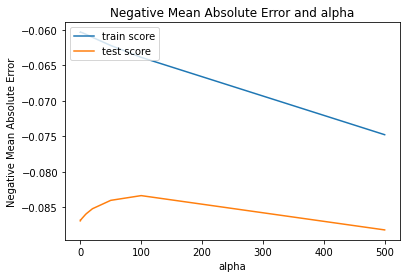

In [37]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [38]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.33137631e-02,  1.74602198e-02, -3.33039071e-02, -2.56778173e-02,
        7.25640998e-03,  3.35833338e-02,  1.06399841e-02,  1.21902682e-02,
        2.46226619e-02,  4.01757725e-02,  2.00892564e-02, -3.08972534e-03,
        7.39220722e-02,  1.55734410e-02,  3.75586307e-04,  2.16008711e-02,
        1.28927213e-02, -5.80711335e-04, -1.90406951e-02,  1.37690467e-02,
        1.34604231e-02, -3.12992971e-03,  2.50514082e-02,  1.14953102e-02,
        6.53739513e-03,  4.24000483e-03,  1.92707634e-03,  8.76625728e-03,
        3.89046837e-03,  1.78855592e-03, -6.46346549e-04,  1.65316993e-03,
       -1.82564488e-02,  4.91123331e-04,  1.11081519e-03,  3.25695992e-03,
        5.89704195e-03,  1.08289833e-02,  4.33719768e-04, -1.22976762e-03,
        2.31613366e-04, -1.70560535e-03, -8.33222654e-03, -9.28832417e-03,
       -1.24832212e-03,  1.87210443e-02,  8.94120367e-03,  2.08144518e-02,
        4.57447702e-03,  3.32332994e-03,  1.05748635e-02,  1.84765823e-03,
        2.26070809e-03,  

In [39]:
# laso
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [40]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.049845,0.006156,0.003205,0.000398,0.0001,{'alpha': 0.0001},-0.089402,-0.082835,-0.089389,-0.088580,-0.079769,-0.085995,0.003964,10,-0.060626,-0.060608,-0.059612,-0.059077,-0.061645,-0.060313,0.000892
1,0.012765,0.001100,0.003000,0.000001,0.001,{'alpha': 0.001},-0.082177,-0.081376,-0.085152,-0.084841,-0.078712,-0.082451,0.002376,6,-0.062140,-0.062840,-0.061018,-0.061052,-0.063070,-0.062024,0.000864
2,0.009402,0.000488,0.003002,0.000002,0.002,{'alpha': 0.002},-0.077177,-0.082798,-0.084200,-0.082471,-0.077363,-0.080802,0.002942,2,-0.064653,-0.065192,-0.063445,-0.063306,-0.065569,-0.064433,0.000912
3,0.009281,0.000517,0.002963,0.000333,0.003,{'alpha': 0.003},-0.075584,-0.083359,-0.085045,-0.081775,-0.077485,-0.080650,0.003567,1,-0.066728,-0.066813,-0.065832,-0.065489,-0.067581,-0.066489,0.000746
4,0.008213,0.000428,0.002684,0.000383,0.004,{'alpha': 0.004},-0.075445,-0.083982,-0.085699,-0.081560,-0.077935,-0.080924,0.003782,3,-0.068694,-0.068357,-0.067922,-0.067371,-0.069159,-0.068301,0.000617


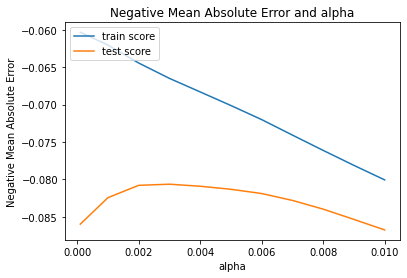

In [42]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [43]:
alpha =0.003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 8.59585938e-03,  1.69380420e-02, -5.73533491e-02, -2.64276877e-02,
        2.06022240e-03,  3.18529129e-02,  5.39153561e-03,  0.00000000e+00,
        3.38517575e-02,  1.38105263e-02, -0.00000000e+00, -7.47136435e-03,
        1.44564719e-01,  1.33978128e-02,  0.00000000e+00,  6.22373369e-03,
        2.06438738e-03, -0.00000000e+00, -2.13253689e-02,  3.05700802e-03,
        1.33408676e-02, -0.00000000e+00,  2.62086583e-02,  6.62602340e-03,
        1.38154371e-03,  1.27533909e-03,  0.00000000e+00,  5.72692556e-03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.39049881e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.54552970e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -8.52849125e-03, -6.36356154e-03,
       -0.00000000e+00,  2.23601495e-02,  6.19985439e-03,  2.12033944e-02,
        1.54956918e-03,  0.00000000e+00,  4.01548403e-03,  8.62761291e-05,
        0.00000000e+00,  

In [44]:
#Results Model 1 : 
Ridge_train_score = ridge.score(X_train,y_train)
Ridge_test_score = ridge.score(X_test, y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train,y_train)
Lasso_test_score = lasso.score(X_test, y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))

Ridge_train_score 0.9484651624786733
Ridge_test_score 0.8652563627432608
Adjusted_R2_score_Ridge_Train 0.9363613386540518
Adjusted_R2_score_Ridge_Test 0.8336095520558426
Lasso_train_score 0.943365376589784
Lasso_test_score 0.8769569611112707
Adjusted_R2_score_Lasso_Train 0.9300637822295154
Adjusted_R2_score_Lasso_Test 0.848058232849269


In [45]:
###### Model 2 : Features based on RFE

In [46]:
#Let us use RFE to select top 25 variables and run the model and evaluate the results
from sklearn.feature_selection import RFE
rfe = RFE(estimator=Ridge(), n_features_to_select=25)    
rfe = rfe.fit(X_train, y_train)
results = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X_train.columns.values))#print("Features sorted by their rank:")
#print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

In [47]:
results

[(1, 'BsmtFinSF1'),
 (1, 'Condition2_PosN'),
 (1, 'FireplaceQu_Gd'),
 (1, 'GarageCars'),
 (1, 'GrLivArea'),
 (1, 'LotArea'),
 (1, 'MSZoning_FV'),
 (1, 'MSZoning_RL'),
 (1, 'Neighborhood_Crawfor'),
 (1, 'OverallCond_3'),
 (1, 'OverallCond_6'),
 (1, 'OverallCond_7'),
 (1, 'OverallCond_8'),
 (1, 'OverallQual_10'),
 (1, 'OverallQual_5'),
 (1, 'OverallQual_6'),
 (1, 'OverallQual_7'),
 (1, 'OverallQual_8'),
 (1, 'OverallQual_9'),
 (1, 'PoolQC_Gd'),
 (1, 'SaleCondition_Normal'),
 (1, 'SaleType_New'),
 (1, 'TotalBsmtSF'),
 (1, 'YearBuilt'),
 (1, 'YearRemodAdd'),
 (2, 'OverallCond_9'),
 (3, 'BsmtExposure_Gd'),
 (4, 'MSSubClass_160'),
 (5, 'KitchenAbvGr'),
 (6, 'MSSubClass_30'),
 (7, 'Foundation_CBlock'),
 (8, 'CentralAir_Y'),
 (9, 'Functional_Typ'),
 (10, 'BsmtUnfSF'),
 (11, 'BsmtFinSF2'),
 (12, 'Condition1_Norm'),
 (13, 'BsmtFullBath'),
 (14, 'OverallQual_2'),
 (15, 'MSSubClass_180'),
 (16, 'ExterQual_Fa'),
 (17, 'FireplaceQu_TA'),
 (18, 'MSZoning_RH'),
 (19, 'Neighborhood_Edwards'),
 (20, 'Ne

In [48]:
#run the ridge and lasso regression models with features selected using RFE
base_col=['BsmtFinSF1','Condition2_PosN','FireplaceQu_Gd','GarageCars','GrLivArea','LotArea','MSZoning_FV','MSZoning_RL',
          'Neighborhood_Crawfor','OverallCond_3','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9',
         'OverallQual_10','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9',
         'PoolQC_Gd','SaleCondition_Normal','SaleType_New','TotalBsmtSF','YearBuilt','YearBuilt','YearRemodAdd']

In [49]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[base_col], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002587,0.000473,0.001404,0.000473,0.0001,{'alpha': 0.0001},-0.080293,-0.089317,-0.091657,-0.081965,-0.086331,-0.085913,0.004288,24,-0.082906,-0.081925,-0.080704,-0.081917,-0.081288,-0.081748,0.000735
1,0.002148,0.000245,0.002011,0.000615,0.001,{'alpha': 0.001},-0.080293,-0.089317,-0.091657,-0.081965,-0.086331,-0.085913,0.004288,23,-0.082906,-0.081925,-0.080704,-0.081917,-0.081288,-0.081748,0.000735
2,0.002717,0.000383,0.001436,0.000479,0.01,{'alpha': 0.01},-0.080292,-0.089317,-0.091657,-0.081964,-0.086331,-0.085912,0.004288,22,-0.082905,-0.081924,-0.080704,-0.081917,-0.081288,-0.081748,0.000735
3,0.002420,0.000496,0.001402,0.000494,0.05,{'alpha': 0.05},-0.080290,-0.089315,-0.091654,-0.081962,-0.086332,-0.085911,0.004288,21,-0.082904,-0.081923,-0.080703,-0.081916,-0.081288,-0.081747,0.000735
4,0.002000,0.000030,0.001592,0.000483,0.1,{'alpha': 0.1},-0.080287,-0.089314,-0.091651,-0.081958,-0.086333,-0.085909,0.004289,20,-0.082902,-0.081920,-0.080702,-0.081915,-0.081287,-0.081745,0.000735


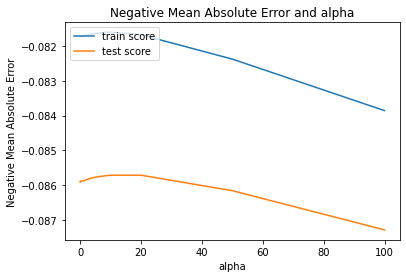

In [51]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [52]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.06124265e-02,  2.30163549e-02, -5.69548646e-02, -2.38449489e-02,
        5.24575566e-03,  4.14611904e-02,  1.62019136e-02,  1.97693324e-02,
        1.81513515e-02,  3.03366810e-02,  1.80297886e-02, -4.82628536e-03,
        1.01014314e-01,  1.67861453e-02,  6.16659096e-04,  1.72086935e-02,
        8.43679165e-03, -2.91306966e-03, -2.17763290e-02,  8.80868871e-03,
        8.08918187e-03,  2.93134791e-03,  2.43748773e-02,  1.13285061e-02,
        6.17194464e-03,  6.40498160e-03,  2.12452004e-03,  9.14448089e-03,
        5.98573962e-03,  3.68201409e-03, -7.62279413e-04,  1.43167960e-03,
       -1.58331067e-02, -5.83894964e-04,  1.63228958e-03,  3.28150049e-03,
        7.24733453e-04,  1.10808464e-02, -5.35983236e-05, -2.98910180e-04,
        6.90230213e-04, -3.93542394e-04, -1.13232809e-02, -8.98868004e-03,
       -8.15809948e-04,  1.70589369e-02,  1.09356572e-02,  2.57157404e-02,
        4.79938224e-03,  3.80883873e-03,  1.08027903e-02,  1.57606164e-03,
        4.57333599e-03,  

In [53]:
# list of alphas to tune
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [54]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train[base_col], y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005180,0.001055,0.001612,0.000454,0.0001,{'alpha': 0.0001},-0.080219,-0.089273,-0.091580,-0.081851,-0.086351,-0.085855,0.004301,2,-0.082865,-0.081864,-0.080666,-0.081890,-0.081267,-0.081710,0.000732
1,0.003201,0.000383,0.001202,0.000401,0.001,{'alpha': 0.001},-0.079749,-0.089256,-0.091227,-0.081063,-0.086926,-0.085644,0.004508,1,-0.082808,-0.081544,-0.080482,-0.081909,-0.081257,-0.081600,0.000765
2,0.003428,0.000465,0.001630,0.000515,0.002,{'alpha': 0.002},-0.079784,-0.089402,-0.091362,-0.081113,-0.088130,-0.085958,0.004634,3,-0.083293,-0.081681,-0.080939,-0.082438,-0.081737,-0.082018,0.000795
3,0.003326,0.000414,0.001036,0.000020,0.003,{'alpha': 0.003},-0.080486,-0.089751,-0.092056,-0.081696,-0.088818,-0.086561,0.004605,4,-0.084129,-0.082254,-0.081958,-0.083340,-0.082336,-0.082804,0.000810
4,0.003007,0.000381,0.001454,0.000470,0.004,{'alpha': 0.004},-0.080886,-0.090319,-0.092416,-0.082451,-0.089081,-0.087030,0.004533,5,-0.084657,-0.083316,-0.082676,-0.084485,-0.082973,-0.083621,0.000803


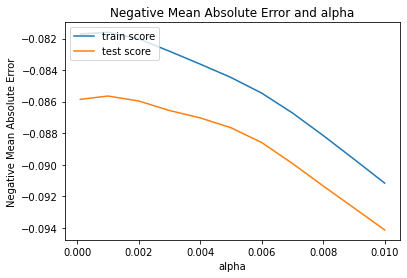

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Optimal alpha for Ridge : 20


#### Optimal alpha for Lasso :0.001

In [57]:
#Fit the model with optimal alpha for both ridge and Lasso regressions.
alpha = 20
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[base_col], y_train)
ridge.coef_

array([ 0.0514181 , -0.03150465,  0.02389871,  0.04000195,  0.1416471 ,
        0.03232641,  0.02326828,  0.03094201,  0.02377032, -0.02722665,
        0.02345762,  0.04017903,  0.02900097,  0.02101105,  0.0512792 ,
        0.02256757,  0.03880573,  0.07290606,  0.08304669,  0.06597453,
       -0.03837231,  0.02742091,  0.03162612,  0.04616864, -0.04423005,
       -0.04423005, -0.02982366])

In [58]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[base_col], y_train) 
lasso.coef_

array([ 5.16638505e-02, -3.04340233e-02,  2.29961913e-02,  3.88639995e-02,
        1.44436822e-01,  3.11781598e-02,  2.22407128e-02,  3.03775113e-02,
        2.29784459e-02, -2.68212260e-02,  2.26765455e-02,  3.97728104e-02,
        2.84771976e-02,  2.00029062e-02,  5.10028518e-02,  2.28842193e-02,
        3.95132872e-02,  7.43046639e-02,  8.44295866e-02,  6.68691383e-02,
       -3.69994938e-02,  2.65721820e-02,  3.08609414e-02,  4.57574863e-02,
       -8.81558964e-02, -1.26066259e-16, -2.90485040e-02])

In [59]:
#Results Model2 : 
Ridge_train_score = ridge.score(X_train[base_col],y_train)
Ridge_test_score = ridge.score(X_test[base_col], y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train[base_col],y_train)
Lasso_test_score = lasso.score(X_test[base_col], y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))

Ridge_train_score 0.9193372231416144
Ridge_test_score 0.8458062672444532
Adjusted_R2_score_Ridge_Train 0.9003922125961824
Adjusted_R2_score_Ridge_Test 0.8095912743212376
Lasso_train_score 0.9193275306019792
Lasso_test_score 0.8481576887420414
Adjusted_R2_score_Lasso_Train 0.9003802436005071
Adjusted_R2_score_Lasso_Test 0.8124949667274604


In [60]:
model_coefficients=pd.DataFrame(X_train[base_col].columns)
model_coefficients['Ridge_Coeff']=pd.DataFrame(ridge.coef_)
model_coefficients['Lasso_Coeff']=pd.DataFrame(lasso.coef_)

In [61]:
model_coefficients

,0,Ridge_Coeff,Lasso_Coeff
0,BsmtFinSF1,0.051418,5.166385e-02
1,Condition2_PosN,-0.031505,-3.043402e-02
2,FireplaceQu_Gd,0.023899,2.299619e-02
3,GarageCars,0.040002,3.886400e-02
4,GrLivArea,0.141647,1.444368e-01
5,LotArea,0.032326,3.117816e-02
6,MSZoning_FV,0.023268,2.224071e-02
7,MSZoning_RL,0.030942,3.037751e-02
8,Neighborhood_Crawfor,0.023770,2.297845e-02
9,OverallCond_3,-0.027227,-2.682123e-02


In [62]:
#model_coefficients.to_csv('model_coefficients.csv')

##### Model 3

In [63]:
#For subjective question #3

Question 3

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the 
incoming data. You will now have to create another model excluding the five most important predictor variables. 
Which are the five most important predictor variables now?

In [64]:
#Running Both ridge and Lasso models without these variables and review the results

In [65]:
#run the ridge and lasso regression models with features selected using RFE
base_col1=['BsmtFinSF1','Condition2_PosN','FireplaceQu_Gd','GarageCars','LotArea','MSZoning_FV','MSZoning_RL',
          'Neighborhood_Crawfor','OverallCond_3','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9',
         'OverallQual_10','OverallQual_5','OverallQual_6','PoolQC_Gd','SaleCondition_Normal','SaleType_New',
           'TotalBsmtSF','YearRemodAdd']

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train[base_col1], y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=500]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002600,0.000489,0.001600,0.000490,0.0001,{'alpha': 0.0001},-0.139255,-0.152203,-0.163532,-0.143285,-0.148393,-0.149334,0.008353,26,-0.143804,-0.143667,-0.140077,-0.144353,-0.141483,-0.142677,0.001628
1,0.003405,0.000796,0.002016,0.000603,0.001,{'alpha': 0.001},-0.139255,-0.152203,-0.163532,-0.143285,-0.148393,-0.149334,0.008353,25,-0.143804,-0.143667,-0.140077,-0.144353,-0.141483,-0.142677,0.001628
2,0.003013,0.000615,0.002012,0.000609,0.01,{'alpha': 0.01},-0.139255,-0.152203,-0.163532,-0.143285,-0.148393,-0.149333,0.008353,24,-0.143804,-0.143667,-0.140077,-0.144353,-0.141483,-0.142677,0.001628
3,0.002403,0.000466,0.001579,0.000448,0.05,{'alpha': 0.05},-0.139253,-0.152202,-0.163530,-0.143285,-0.148393,-0.149333,0.008353,23,-0.143804,-0.143666,-0.140077,-0.144353,-0.141483,-0.142677,0.001628
4,0.002600,0.000468,0.001189,0.000383,0.1,{'alpha': 0.1},-0.139251,-0.152201,-0.163529,-0.143286,-0.148394,-0.149332,0.008353,22,-0.143805,-0.143666,-0.140077,-0.144353,-0.141483,-0.142677,0.001628


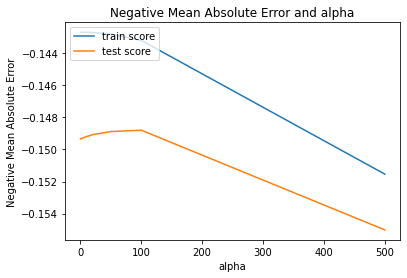

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train[base_col1], y_train)
ridge.coef_

array([ 0.05291088, -0.04004145,  0.04089543,  0.10952839,  0.0478325 ,
        0.0351058 ,  0.04815815,  0.03040492, -0.03672122,  0.00722092,
        0.01284106,  0.00103315,  0.01205009,  0.04728205, -0.05577036,
       -0.02773837, -0.04506631,  0.02038356,  0.02181101,  0.08325   ,
       -0.09406503])

In [70]:
# list of alphas to tune
params_lasso = {'alpha': [0.0001,0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [71]:
lasso = Lasso()

# cross validation
model_cv_losso = GridSearchCV(estimator = lasso, 
                        param_grid = params_lasso, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_losso.fit(X_train[base_col1], y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009, 0.01, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
cv_results = pd.DataFrame(model_cv_losso.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.6]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003191,0.000404,0.001817,0.000371,0.0001,{'alpha': 0.0001},-0.139192,-0.152160,-0.163500,-0.143322,-0.148411,-0.149317,0.008349,3,-0.143820,-0.143668,-0.140072,-0.144358,-0.141490,-0.142682,0.001631
1,0.002821,0.000203,0.001430,0.000466,0.001,{'alpha': 0.001},-0.138616,-0.151926,-0.163272,-0.143662,-0.148583,-0.149212,0.008349,1,-0.144012,-0.143733,-0.140080,-0.144467,-0.141612,-0.142781,0.001669
2,0.003160,0.000214,0.001263,0.000391,0.002,{'alpha': 0.002},-0.138031,-0.151907,-0.163047,-0.144210,-0.148874,-0.149214,0.008352,2,-0.144241,-0.143914,-0.140209,-0.144659,-0.141806,-0.142966,0.001694
3,0.002746,0.000402,0.001627,0.000462,0.003,{'alpha': 0.003},-0.137486,-0.151953,-0.162949,-0.144912,-0.149297,-0.149319,0.008392,4,-0.144552,-0.144188,-0.140420,-0.144891,-0.142055,-0.143221,0.001715
4,0.003165,0.000302,0.001254,0.000392,0.004,{'alpha': 0.004},-0.136981,-0.152121,-0.163080,-0.145659,-0.149693,-0.149507,0.008518,5,-0.144968,-0.144458,-0.140788,-0.145177,-0.142331,-0.143544,0.001709


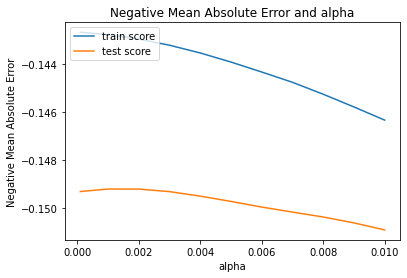

In [73]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [74]:
#Fit the model with optimal alpha for both ridge and Lasso regressions.
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train[base_col1], y_train)
ridge.coef_

array([ 0.05291088, -0.04004145,  0.04089543,  0.10952839,  0.0478325 ,
        0.0351058 ,  0.04815815,  0.03040492, -0.03672122,  0.00722092,
        0.01284106,  0.00103315,  0.01205009,  0.04728205, -0.05577036,
       -0.02773837, -0.04506631,  0.02038356,  0.02181101,  0.08325   ,
       -0.09406503])

In [75]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train[base_col1], y_train) 
lasso.coef_

array([ 0.05272925, -0.04422318,  0.04057229,  0.11540148,  0.05007197,
        0.03586347,  0.04861038,  0.031821  , -0.03729019,  0.007999  ,
        0.01341745,  0.        ,  0.01001834,  0.05014937, -0.05618717,
       -0.0278939 , -0.05205385,  0.01908156,  0.01737697,  0.08516839,
       -0.09954709])

In [76]:
#Results - Model 3 
Ridge_train_score = ridge.score(X_train[base_col1],y_train)
Ridge_test_score = ridge.score(X_test[base_col1], y_test)
n=len(X_train)
n1=len(y_test)
k=len(list(X_train.columns.values))
print('Ridge_train_score',Ridge_train_score)
print('Ridge_test_score',Ridge_test_score)
print('Adjusted_R2_score_Ridge_Train',1-(1-Ridge_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Ridge_Test',1-(1-Ridge_test_score)*((n-1)/(n-(k+1))))

Lasso_train_score = lasso.score(X_train[base_col1],y_train)
Lasso_test_score = lasso.score(X_test[base_col1], y_test)
print('Lasso_train_score',Lasso_train_score)
print('Lasso_test_score',Lasso_test_score)
print('Adjusted_R2_score_Lasso_Train',1-(1-Lasso_train_score)*((n-1)/(n-(k+1))))
print('Adjusted_R2_score_Lasso_Test',1-(1-Lasso_test_score)*((n-1)/(n-(k+1))))  


Ridge_train_score 0.7759683606353113
Ridge_test_score 0.7042033515410173
Adjusted_R2_score_Ridge_Train 0.7233507601065587
Adjusted_R2_score_Ridge_Test 0.6347305309586413
Lasso_train_score 0.7775562249908495
Lasso_test_score 0.690239727940786
Adjusted_R2_score_Lasso_Train 0.7253115611267149
Adjusted_R2_score_Lasso_Test 0.6174873153748206


In [77]:
model_coefficients=pd.DataFrame(X_train[base_col1].columns)
model_coefficients['Ridge_Coeff']=pd.DataFrame(ridge.coef_)
model_coefficients['Lasso_Coeff']=pd.DataFrame(lasso.coef_)

In [78]:
model_coefficients

,0,Ridge_Coeff,Lasso_Coeff
0,BsmtFinSF1,0.052911,0.052729
1,Condition2_PosN,-0.040041,-0.044223
2,FireplaceQu_Gd,0.040895,0.040572
3,GarageCars,0.109528,0.115401
4,LotArea,0.047832,0.050072
5,MSZoning_FV,0.035106,0.035863
6,MSZoning_RL,0.048158,0.048610
7,Neighborhood_Crawfor,0.030405,0.031821
8,OverallCond_3,-0.036721,-0.037290
9,OverallCond_6,0.007221,0.007999


In [79]:
#model_coefficients.to_csv('model_coefficients_new.csv')